**I have discussed with KARANAM DHANVI with roll no: 23M1190 while doing the assignment**

While doing the assignment, the numpy and pandas library has been used by me,  and they made the things simple where some of the things were done from scratch level in the first assignment. Though i haven't utilised fully the library but i have learnt how to deal with the data sets, processing of the data, how to find correlation among the variables, calclation of MSE, accuracy and so on.

Mainly the assignment MLforSmartMonkeys given by professor has helped a lot for doing the assignment. The things which explained while discussing that weren't clear and it was like an alien at the time of the lecture but while doing the assignment and when I was going through the thing prof has given then i really understood the purpose of doing them.  

**Question 1**
In the question 1a, the dataset is downloaded from the website.
In 1b), the preprocessing of data and how the features are distributed were checked in the similar way prof has explained in the example.
In 1c) The hyperparameter tuning is done by gridsearch by splitting the data into tarining and testing  two sets in 80:20 ratio. It could have been done by splitting the data set into 3 parts namely training, validation and testing, and using the validation for hyper parameter tuning and testing on the test data set. But I have chosen to use Gridsearch from scikit-learn library, with 5 fold cross validation which automatically does the hyper parameter tuning by searching for the optimal combination of hyper paramters for a given model. The models which i have chosen to do are i. random forest and support vector machine with regression model though the data is **discrete**. I haven't done the neural network modelling but I have gone through it how it is to be done. The hyperameters used in SVM are regularisation and kernel width in SVM; max depth and no.of trees in random forest. The MSE i got  in case of SVM with grid search is more than that of Random forest. The comparison of the models with MSE is shown as the observation after the cell.

1d) In this, the relative importance of each feature in a predictive modelling task. From this we can understand the features which have significant importance on target variable so that we can eliminate the less important feature.

1e) In this, the model which is trained on oned data set is used for testing the other data set and checked the performance of it.

**Question 2:**
In the second question the data set is different than the data set used in question 1 and in this we have many nulls which was not in the case of question1. So, inaddition to what we have done in question 1 we have done imputation to deal with the missing variables. And remaining things are similar to question1. But in this question I have used classification model of SVM and Random forest in the question2. The accuracy is used as a parameter for comparing the models.
2d)The recursive feature elimination has been used. By removing the unnecessary features we can eliminate the issue of overfitting.

**Question3**
I have gone through the code which is copied from the website and it has resnet18 convNet is used as feature extractor which is a type of deep neural network. The model is having data set of ants and bees, the code which i run will find whether the selected images of training set in the example it is found for 4 images which can be extended to any no.of images.
In 3b) The function generates the features of the image which is given as input to the function. The ouput produces the dataset dimensions as NX512.
In 3c) Along with the features, labels are also taken as ouput of the training dataset, then using the labels and features, the trained data set is trained with SVM and random forest models and tested them on the testing data set and found the accuracy of prediction.

**Question4**
The SVM model for redwine data set is deployed on a local web server using the streamlit app. The features of the dataset are set as sliders so that based on the proportion of feature the mean square varies.
The question4 has been attached as a seperate file since i have made using spyder. and First 3 questions with the google colab.

The results and observation of each cell is entered afer the cell wherever it is required.


In [ ]:
#Importing the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix #For plotting scatter plot
from sklearn import preprocessing # For data preprocessing
from sklearn.model_selection import train_test_split #For splitting training and testing data

# 1.a) Downloading the wine quality datasets from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [ ]:
#The links which are used for the writing the code for Q1 are
#https://chat.openai.com/c/d7ee86a4-61e0-4bd6-92c7-89b6046f2136
#And mainly from the code provided by Amit sethi sir which is MLforSmartMonkeys.ipynb

#Downloading the wine quality datasets from https://archive.ics.uci.edu/ml/datasets/Wine+Quality
dataset_redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')#reading the redwine csv file into data_readwine from the csv files uploaded in the folder
dataset_whitewine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')#reading the whitewine csv file into data_whitewine from the csv files uploaded in the folder


# 1. b). Explore, visualize, and pre-process the data as appropriate.

In [ ]:
#Splitting the data set into training and validation
#Creating a split such as 80-20

data_redwine = dataset_redwine.drop(columns=['quality'])#seperating the features and target
y_red = dataset_redwine['quality']

#Quality is the required ouput, so seperating the columns as features and ouput
data_whitewine = dataset_whitewine.drop(columns=['quality'])#seperating the features and target
y_white = dataset_whitewine['quality']

#splitting given data set to 20% testing,80%training data for red and white wine
data_redwine_train, data_redwine_test, y_red_train, y_red_test = train_test_split(data_redwine, y_red, test_size = 0.2, random_state=42)

data_whitewine_train, data_whitewine_test, y_white_train, y_white_test = train_test_split(data_whitewine, y_white, test_size = 0.2, random_state=42)


#Now we will check
(i) The data type of every column
(ii) Missing values
(iii) Histograms of all the columns to check the good spread

In [ ]:
#Visualisation of datasets Display header and a few rows of redwine and white wine data set

display(data_redwine_train)
display(data_redwine_train.info())

display(data_whitewine_train)
display(data_whitewine_train.info())
print(data_redwine_train.dtypes)
print(data_whitewine_train.dtypes)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493             8.7             0.690         0.31             3.0      0.086   
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
493                  23.0                  81.0  1.00020  3.48       0.74   
354                  40.5                 165.0  0.99120  3.25       0.59   
342                   6.0                  14.0  0.99820  3.30       0.75   
834                  16.0                  23.0  0.99694  3.32       0.47   
705                  11.0                  54.0  0.99900  3.37       0.49   
...                   ...                   ...      ...   ...        ...   
1130                  5.0                  10.0  0.99770  3.18       0.63   
1294                 25.0                  60.0  0.99638  3.29       0.75   
860                  15.0                  85.0  0.99746  3.51       0.54   
1459                  7.0                  15.0  0.99458  3.32       0.80   
1126                  3.0                  11.0  0.99150  3.39       0.54   

      alcohol  
493      11.6  
354      11.9  
342       9.8  
834       9.4  
705       9.9  
...       ...  
1130     10.4  
1294     10.9  
860       9.5  
1459     11.9  
1126     13.5  

[1279 rows x 11 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 493 to 1126
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 119.9 KB


None

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4665            7.3              0.17         0.36            8.20      0.028   
1943            6.3              0.25         0.44           11.60      0.041   
3399            5.6              0.32         0.33            7.40      0.037   
843             6.9              0.19         0.35            1.70      0.036   
2580            7.7              0.30         0.26           18.95      0.053   
...             ...               ...          ...             ...        ...   
4426            6.2              0.21         0.52            6.50      0.047   
466             7.0              0.14         0.32            9.00      0.039   
3092            7.6              0.27         0.52            3.20      0.043   
3772            6.3              0.24         0.29           13.70      0.035   
860             8.1              0.27         0.35            1.70      0.030   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4665                 44.0                 111.0  0.99272  3.14       0.41   
1943                 48.0                 195.0  0.99680  3.18       0.52   
3399                 25.0                  95.0  0.99268  3.25       0.49   
843                  33.0                 101.0  0.99315  3.21       0.54   
2580                 36.0                 174.0  0.99976  3.20       0.50   
...                   ...                   ...      ...   ...        ...   
4426                 28.0                 123.0  0.99418  3.22       0.49   
466                  54.0                 141.0  0.99560  3.22       0.43   
3092                 28.0                 152.0  0.99129  3.02       0.53   
3772                 53.0                 134.0  0.99567  3.17       0.38   
860                  38.0                 103.0  0.99255  3.22       0.63   

      alcohol  
4665     12.4  
1943      9.5  
3399     11.1  
843      10.8  
2580     10.4  
...       ...  
4426      9.9  
466       9.4  
3092     11.4  
3772     10.6  
860      10.4  

[3918 rows x 11 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 4665 to 860
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
dtypes: float64(11)
memory usage: 367.3 KB


None

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object


Observations: All data types are int or float, which are only numerical values

In [ ]:
#To find the data type, null values, no.of unique values in the given data set
print('----------------------------------------------------------')
print('The diversity in the features of Red wine is as follows:')
print('----------------------------------------------------------')
for col in data_redwine_train.columns.values: #For every column
  list_vals = pd.unique(data_redwine_train[col]) #Creates list of unique values
  print(col + ' is of type' + str(data_redwine_train[col].dtypes) + ', has ' + str(len(list_vals))+ ' unique values, and ' + str(np.sum(pd.isnull(data_redwine_train[col])))+ ' null entries')
  if(len(list_vals)<10): #If column has less than 10 unique values print the values
    list_str = ''
    for i in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[i]) + ','
    print(' These are: '+list_str[0:len(list_str)-2])

print('\n----------------------------------------------------------')
print('The diversity in the features of White wine is as follows:')
print('----------------------------------------------------------')
for col in data_whitewine_train.columns.values: #For every column
  list_vals = pd.unique(data_whitewine_train[col]) #Creates list of unique values
  print(col + ' is of type' + str(data_whitewine_train[col].dtypes) + ', has ' + str(len(list_vals))+ ' unique values, and ' + str(np.sum(pd.isnull(data_whitewine_train[col])))+ ' null entries')
  if(len(list_vals)<10): #If column has less than 10 unique values print the values
    list_str = ''
    for i in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[i]) + ','
    print(' These are: '+list_str[0:len(list_str)-2])

----------------------------------------------------------
The diversity in the features of Red wine is as follows:
----------------------------------------------------------
fixed acidity is of typefloat64, has 91 unique values, and 0 null entries
volatile acidity is of typefloat64, has 138 unique values, and 0 null entries
citric acid is of typefloat64, has 79 unique values, and 0 null entries
residual sugar is of typefloat64, has 82 unique values, and 0 null entries
chlorides is of typefloat64, has 143 unique values, and 0 null entries
free sulfur dioxide is of typefloat64, has 57 unique values, and 0 null entries
total sulfur dioxide is of typefloat64, has 139 unique values, and 0 null entries
density is of typefloat64, has 386 unique values, and 0 null entries
pH is of typefloat64, has 86 unique values, and 0 null entries
sulphates is of typefloat64, has 92 unique values, and 0 null entries
alcohol is of typefloat64, has 60 unique values, and 0 null entries

----------------------

Observations:

1. None of the columns have any null entries.
2. Number of unique values are more in many of the columns in both the data tests. So they can be treated as continuous variables.


---------------------------------------------
Histogram for each column of Red wine data set
---------------------------------------------


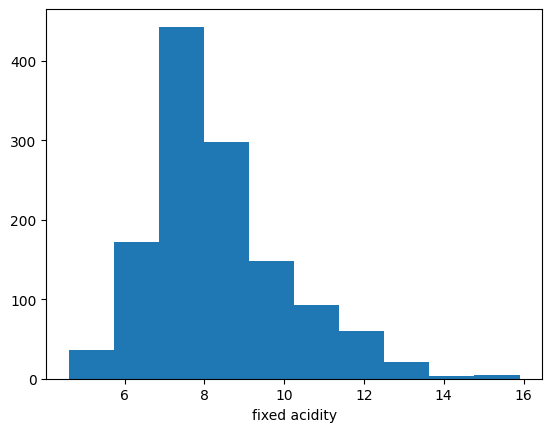

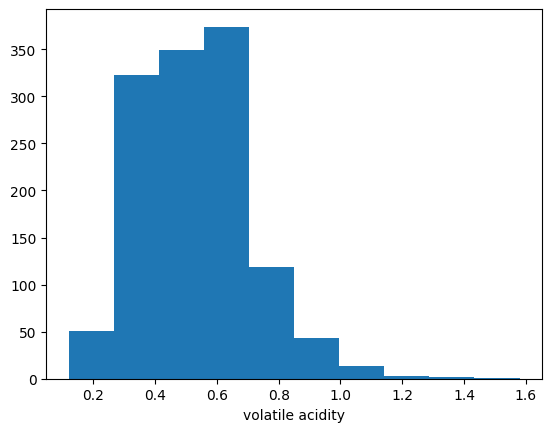

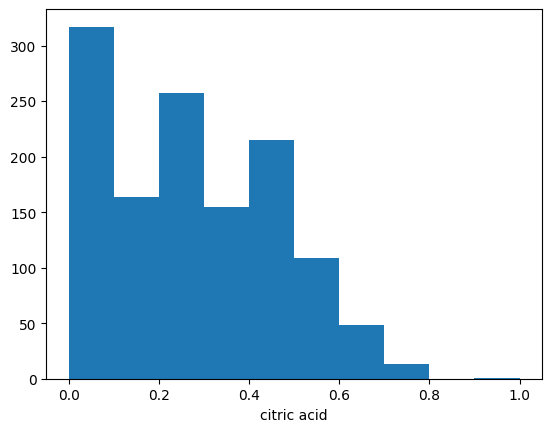

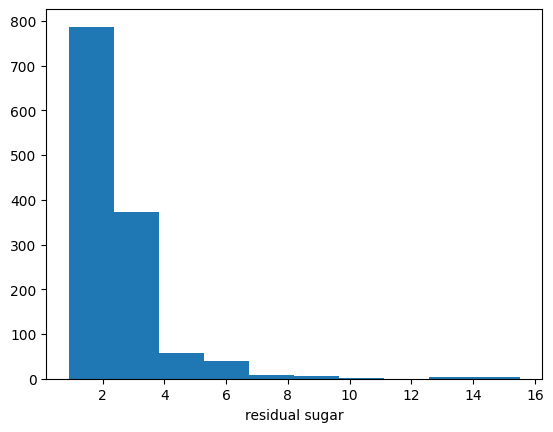

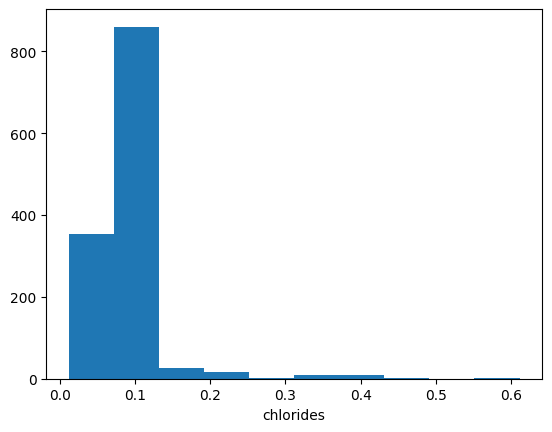

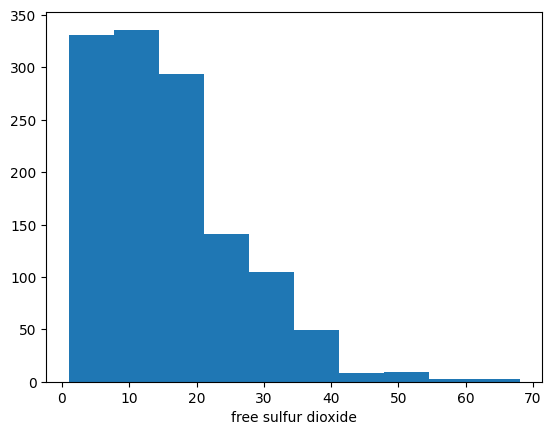

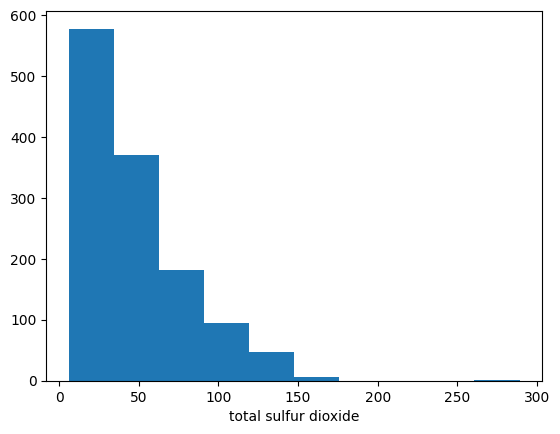

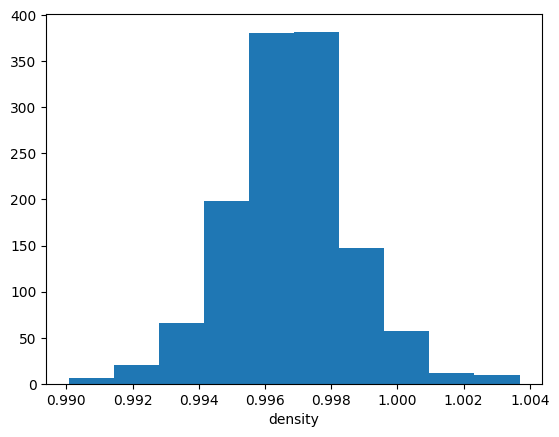

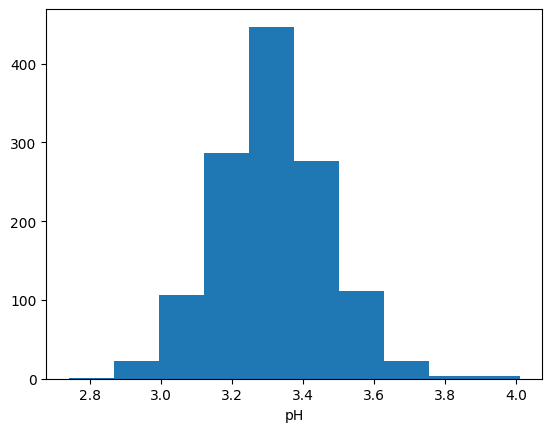

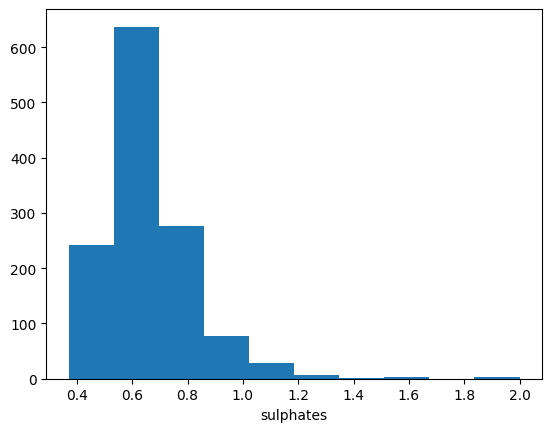

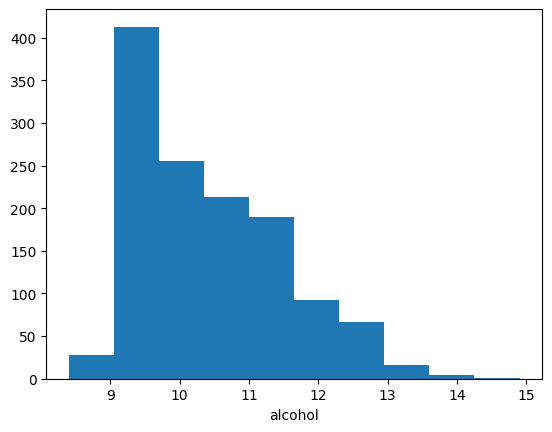

---------------------------------------------
Histogram for each column of White wine data set
---------------------------------------------


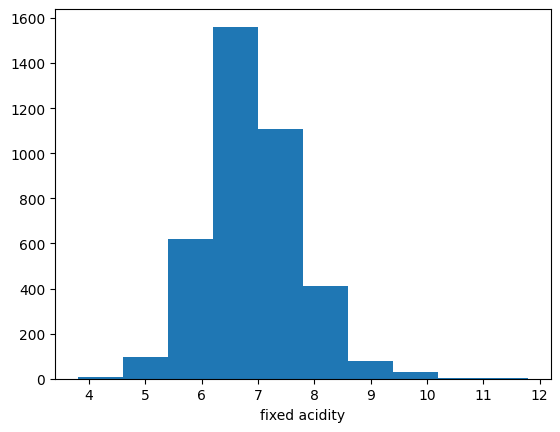

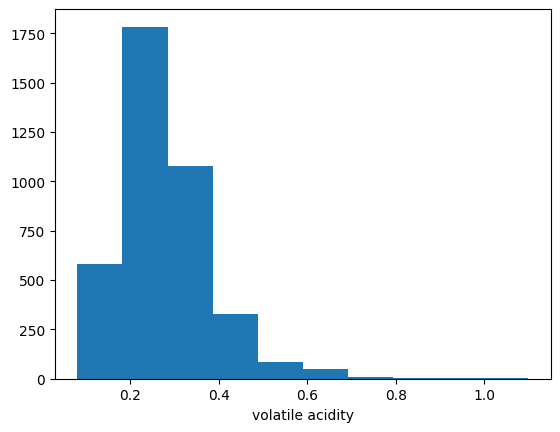

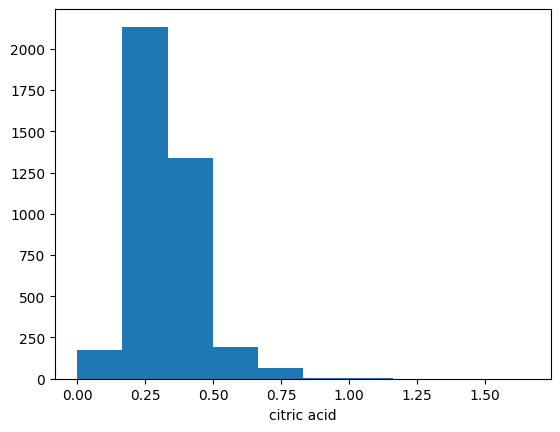

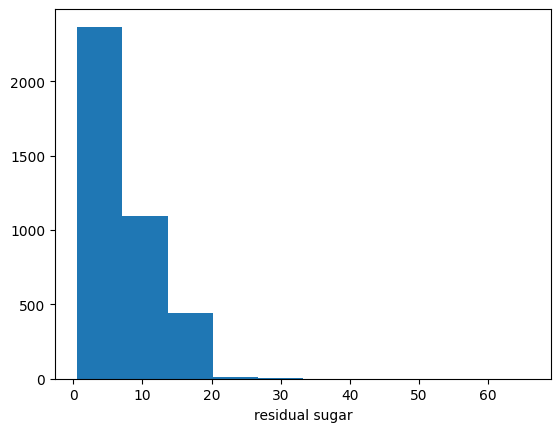

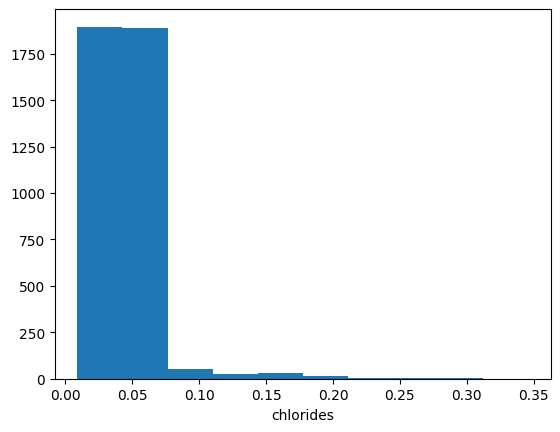

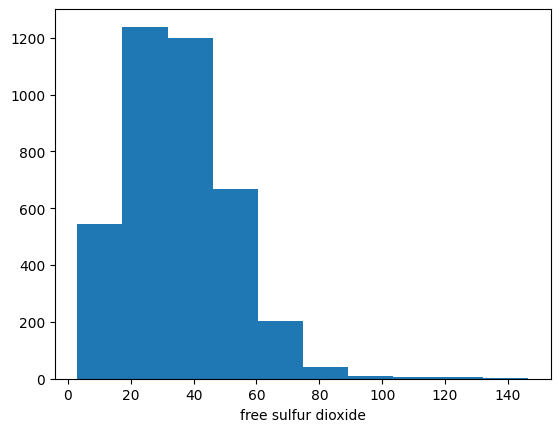

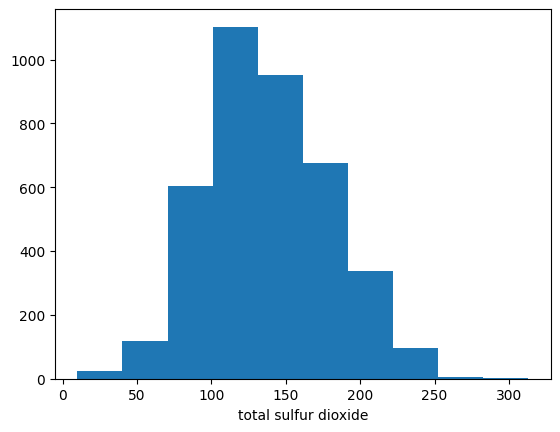

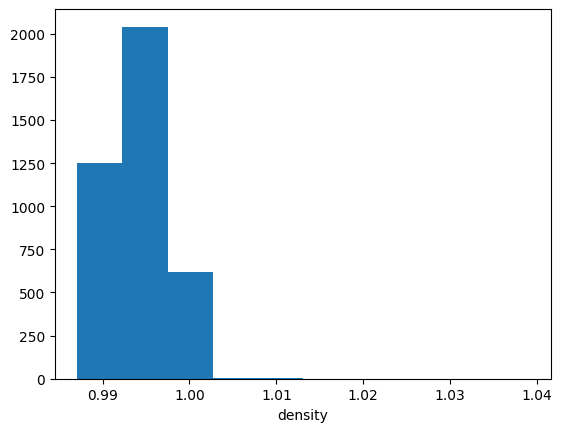

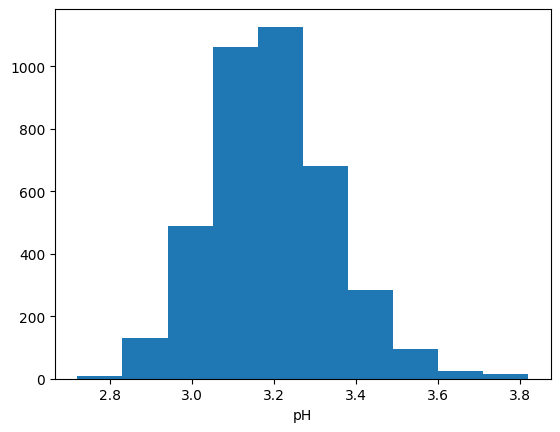

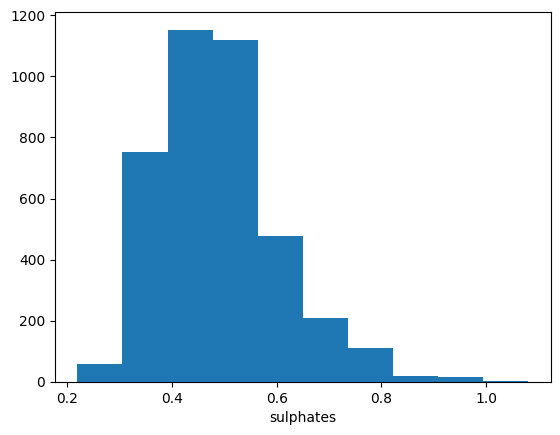

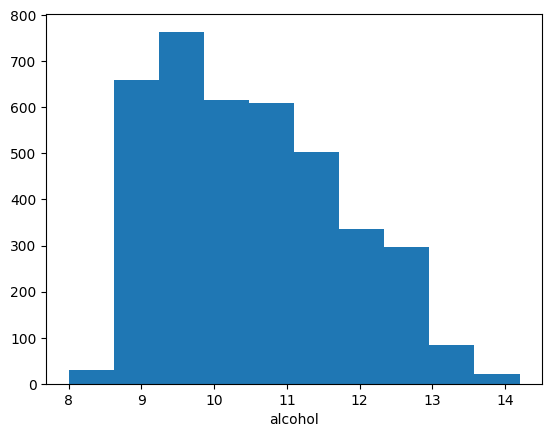

In [ ]:
#Plot histograms for each column of both the data sets
print('---------------------------------------------')
print('Histogram for each column of Red wine data set')
print('---------------------------------------------')
for col in data_redwine_train.columns.values:
  if (data_redwine_train[col].dtypes == 'int64') | (data_redwine_train[col].dtypes == 'float64'):
    plt.hist(data_redwine_train[col])
    plt.xlabel(col)
    plt.show()

print('---------------------------------------------')
print('Histogram for each column of White wine data set')
print('---------------------------------------------')
for col in data_whitewine_train.columns.values:
  if (data_whitewine_train[col].dtypes == 'int64') | (data_whitewine_train[col].dtypes == 'float64'):
    plt.hist(data_whitewine_train[col])
    plt.xlabel(col)
    plt.show()

Observation:

From the histogram all the variables are spread well so we can't drop any variable.

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>,
        <Axes: xlabel='chlorides', ylabel

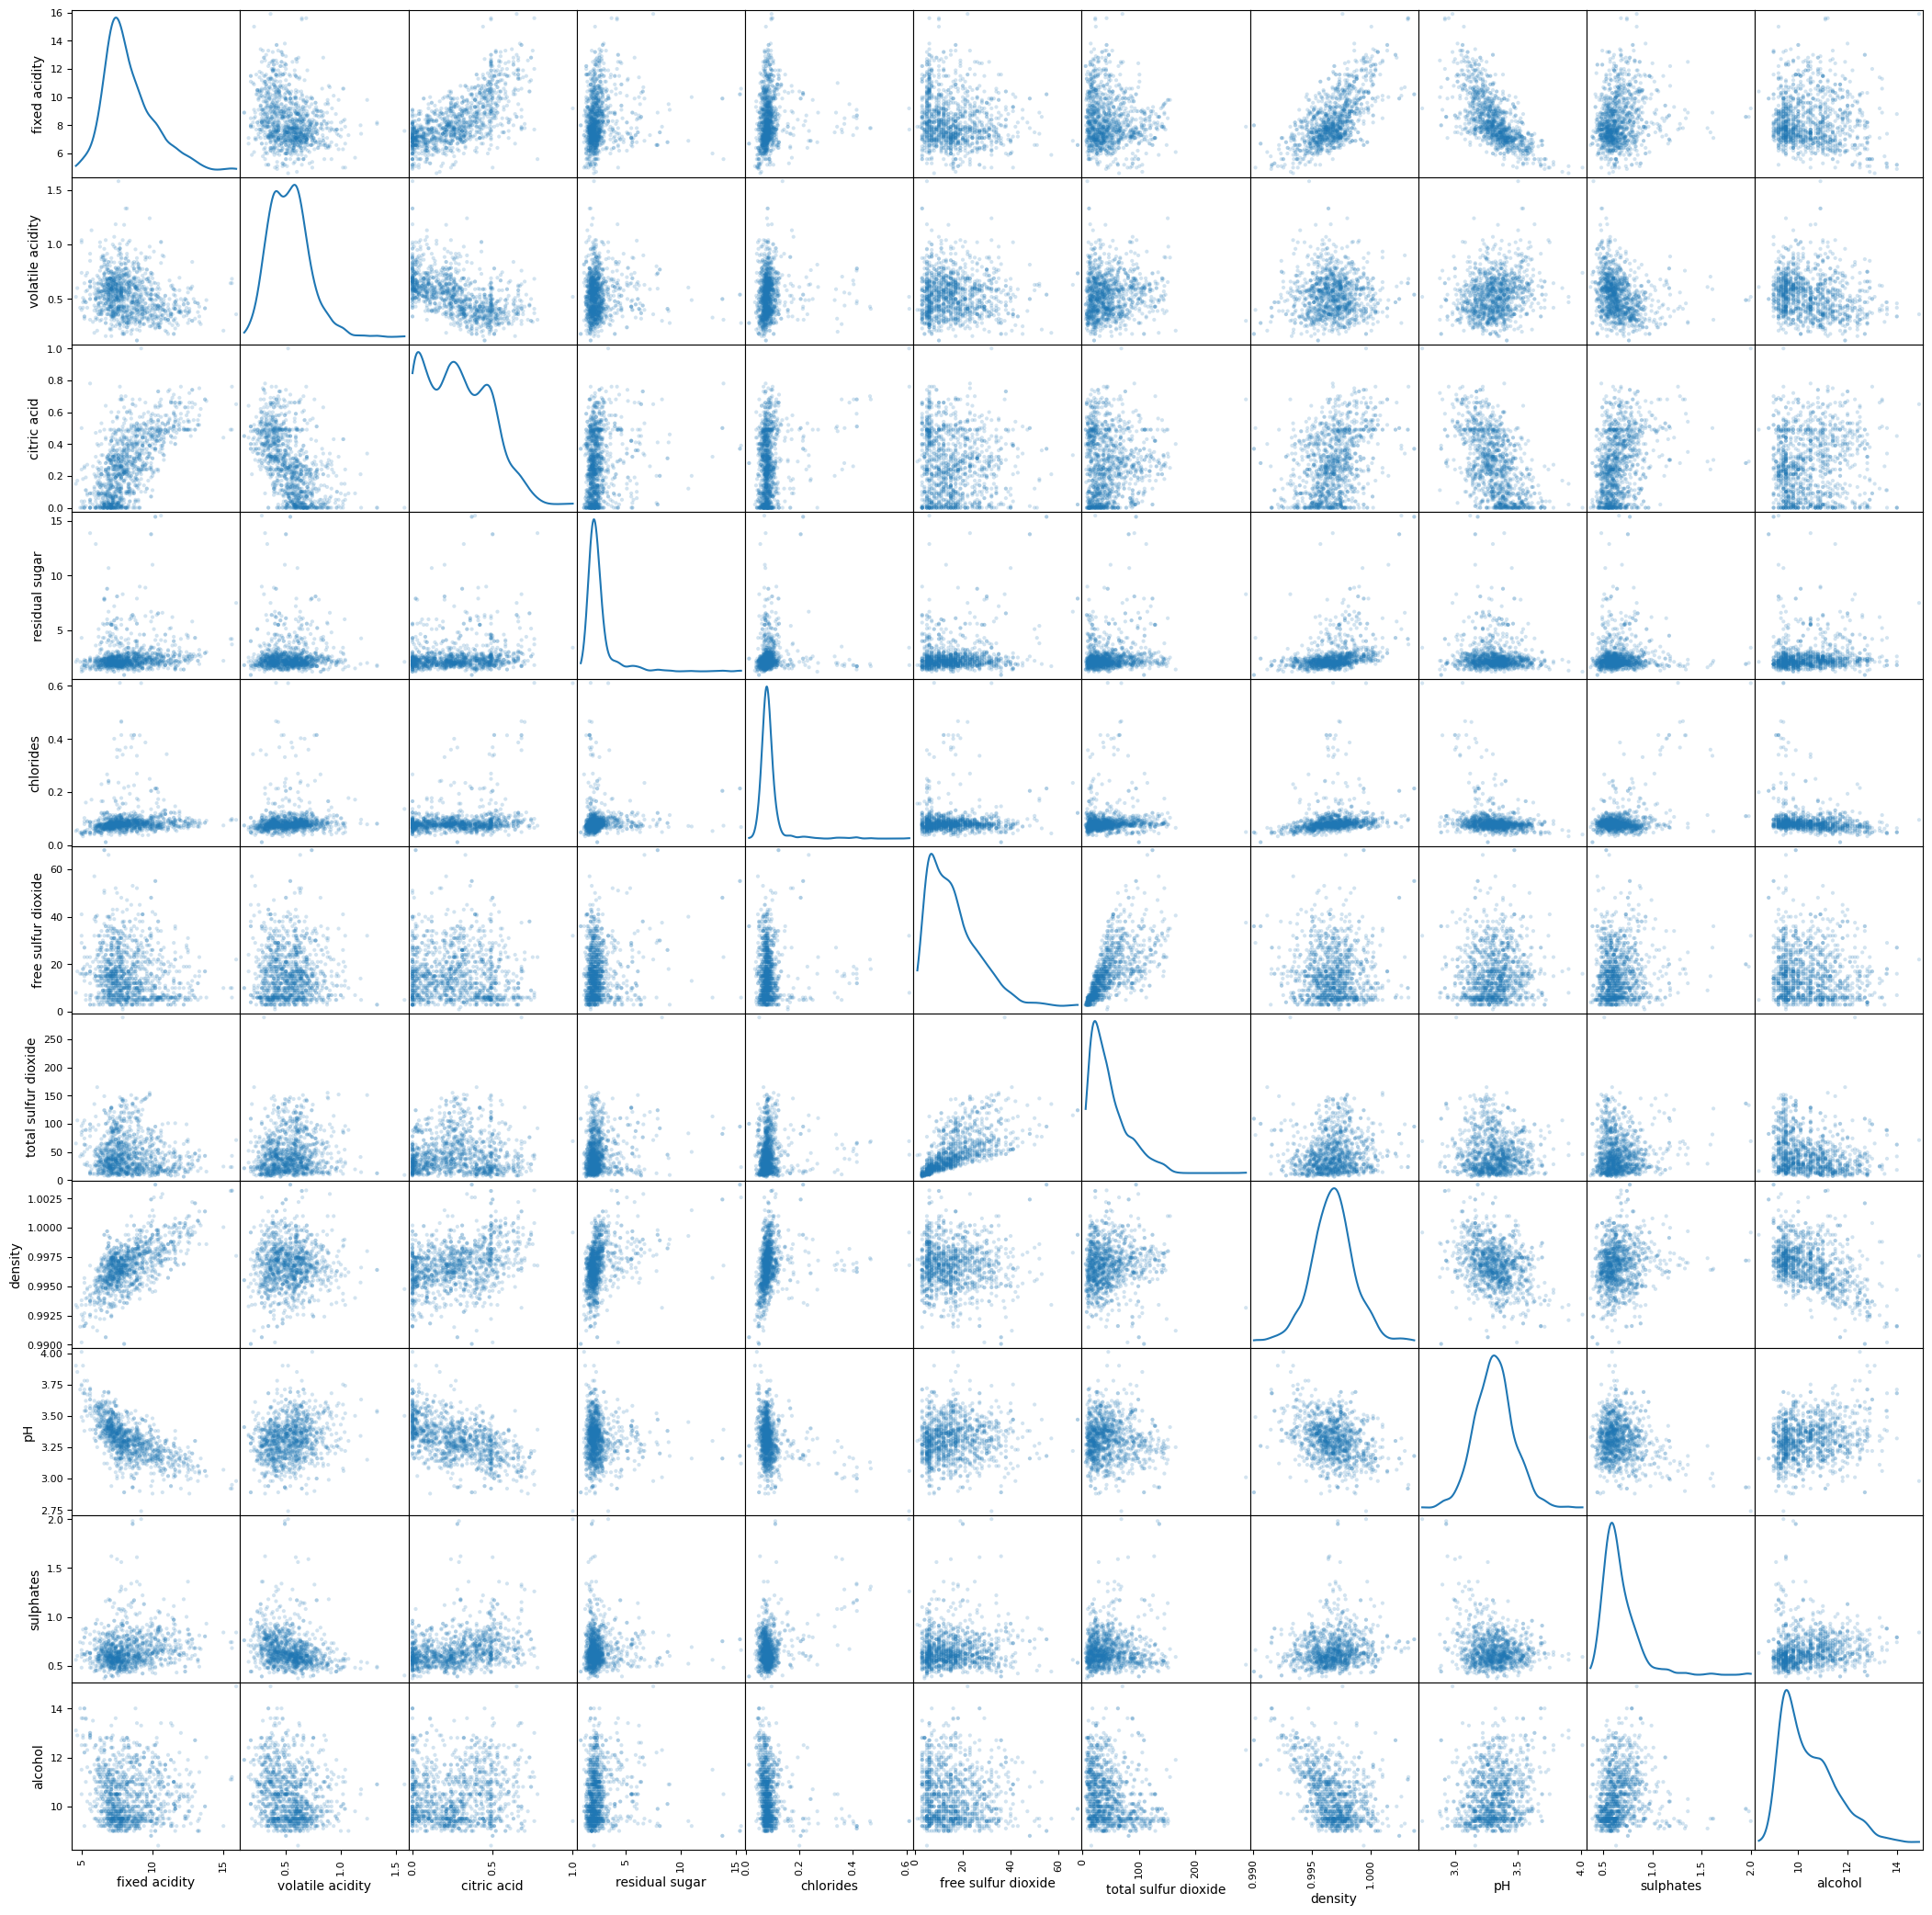

In [ ]:
#Plotting pair-wise scatter matrices
#Plots every column with all other columns for red wine

scatter_matrix(data_redwine_train, alpha=0.2, figsize=(26, 26), diagonal='kde') # kde is kernel density estimation

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>,
        <Axes: xlabel='chlorides', ylabel

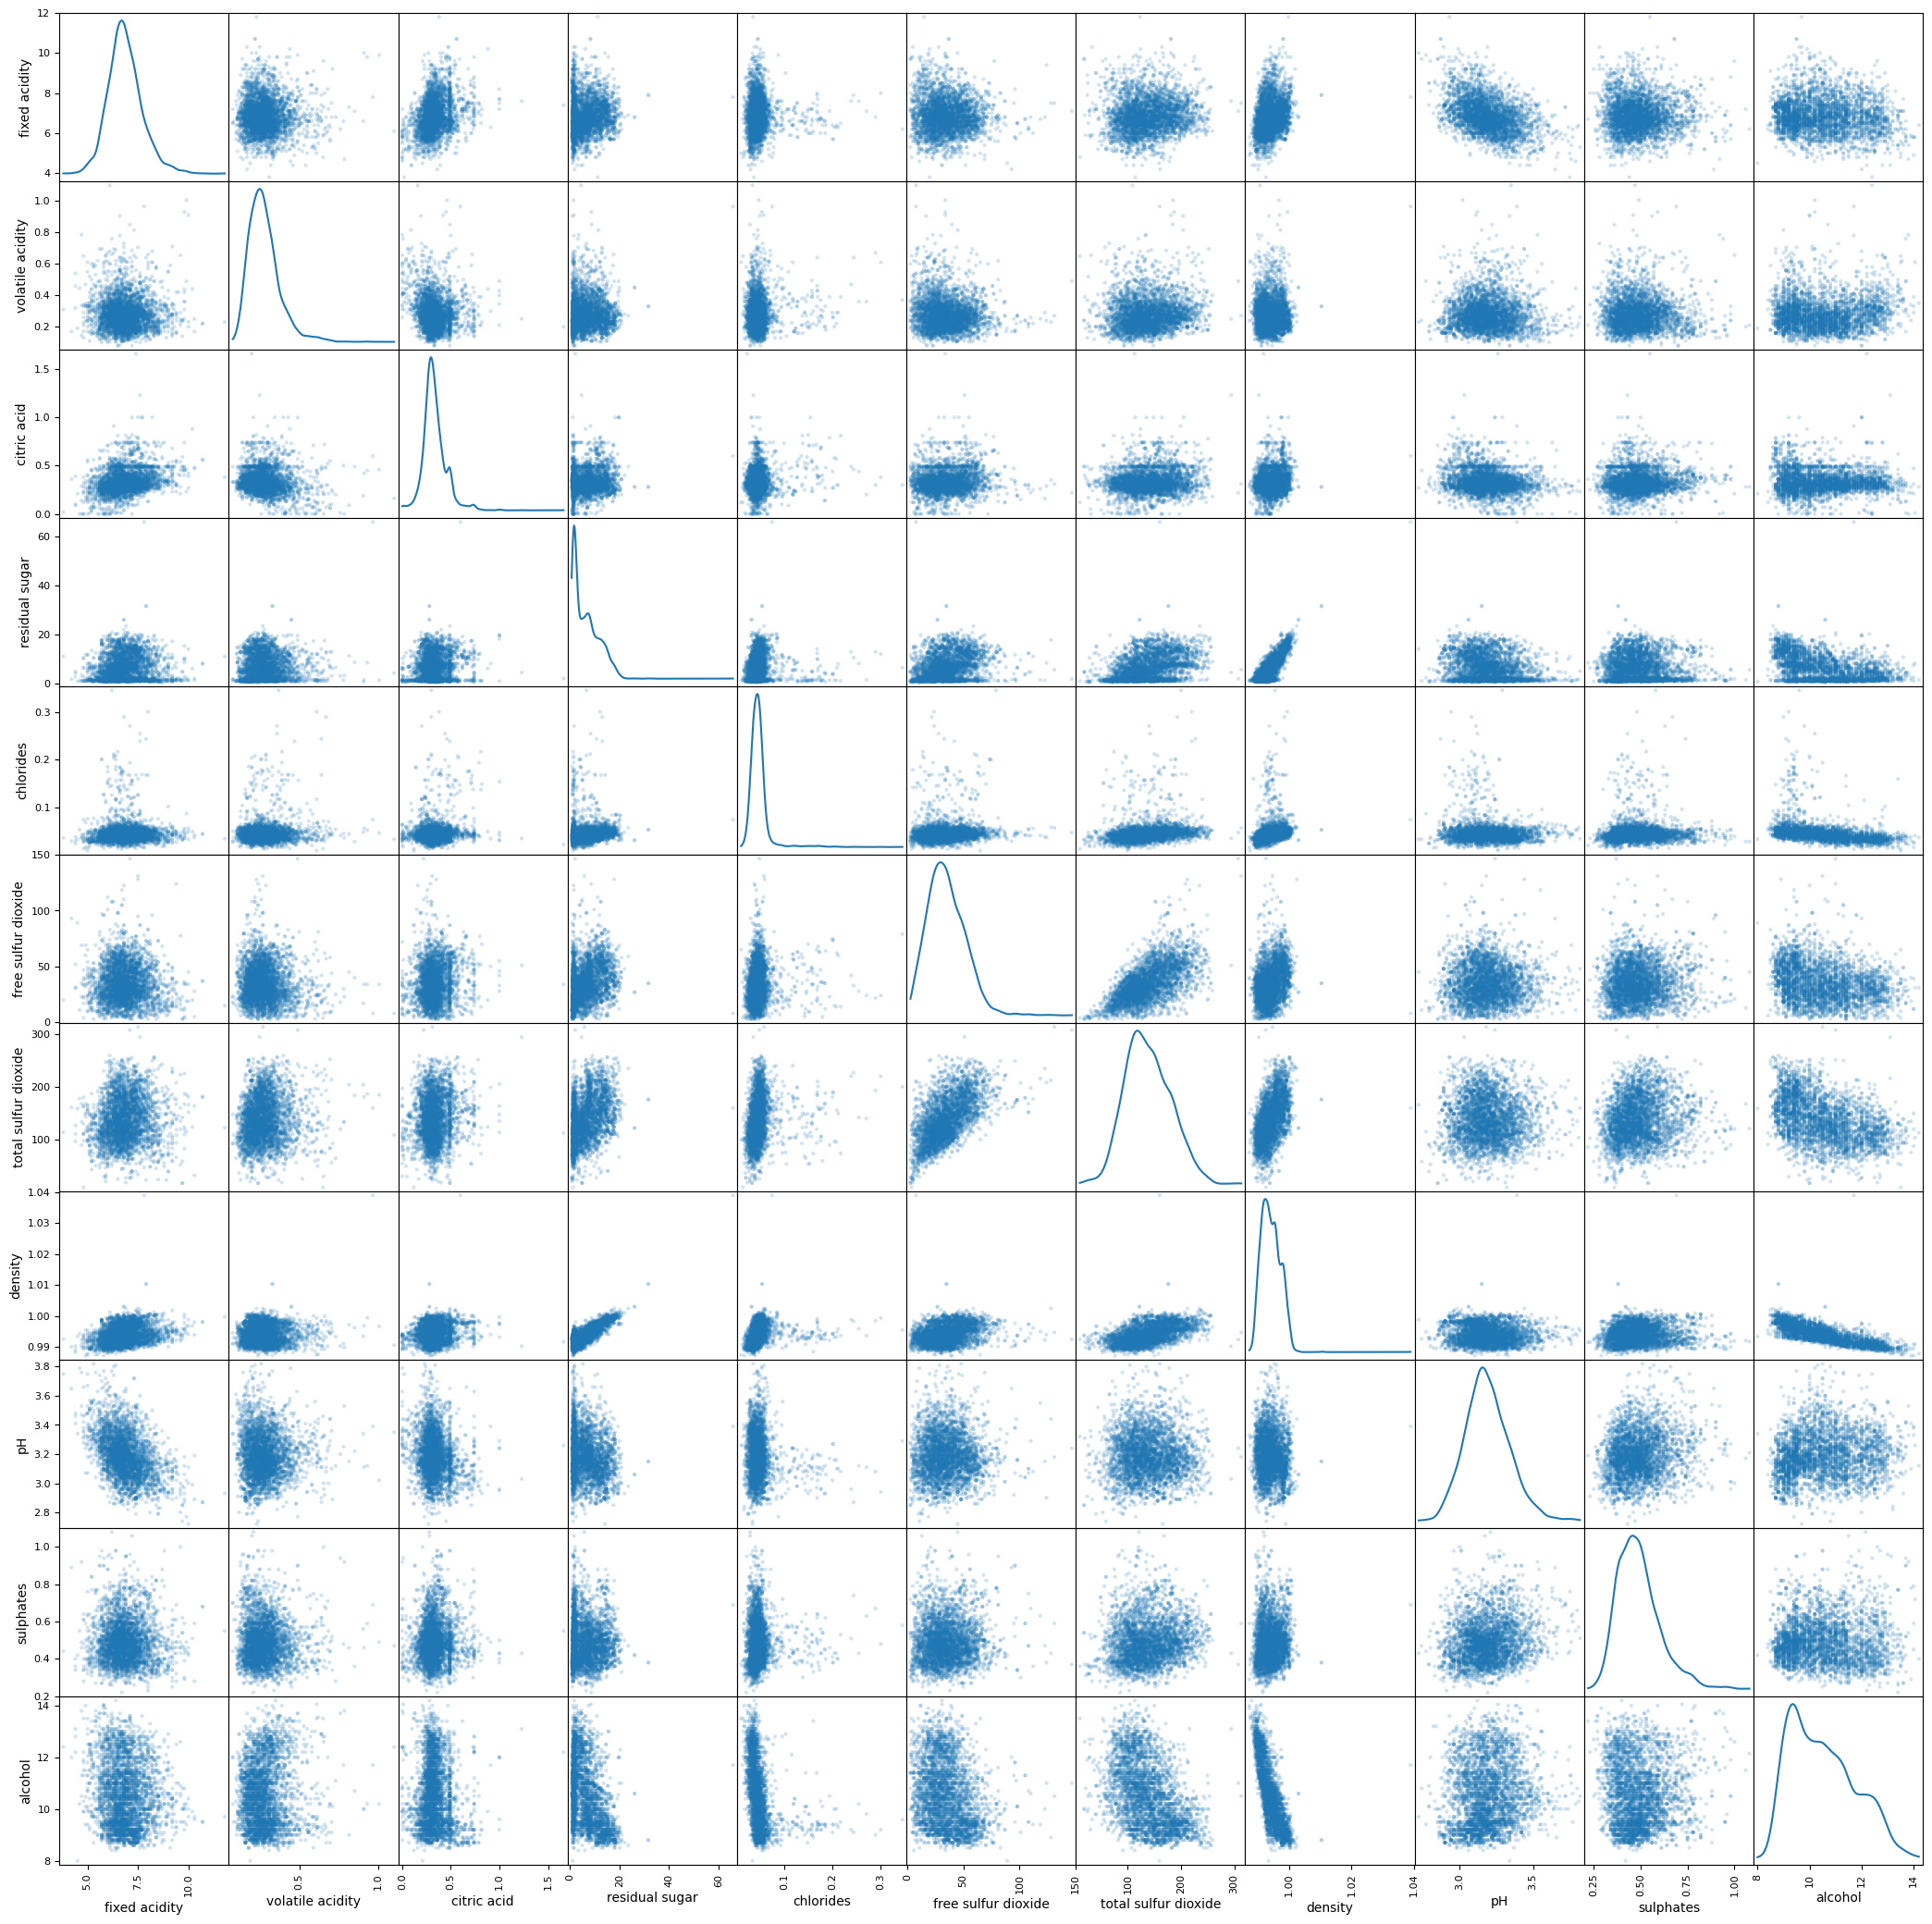

In [ ]:
#Plotting pair-wise scatter matrices
#Plots every column with all other columns for white wine
scatter_matrix(data_whitewine_train, alpha=0.2, figsize=(26, 26), diagonal='kde') # kde is kernel density estimation

The variable pairs whose scatter looks like straight lines or thin curves are correlated. We can eliminate some of them

Variables whose scatter show multiple vertical or horizontal lines are heavily quantised.



Plotting the correlation matrix to visualise the data in a better way. Perfect negative correlation is also a perfect correlation. So we will plot absolute value.

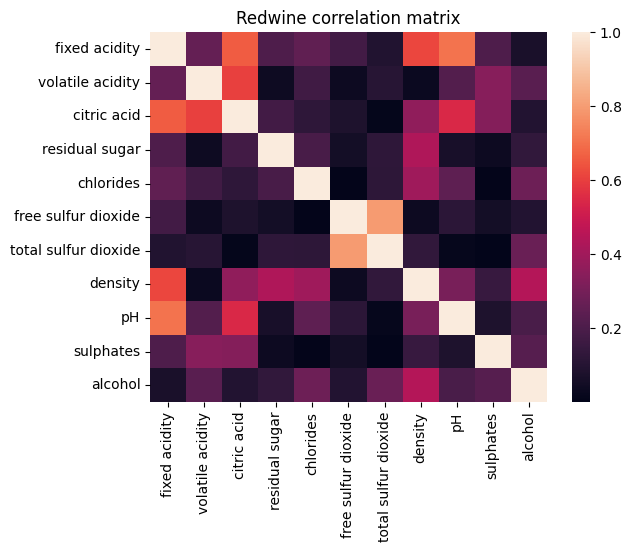

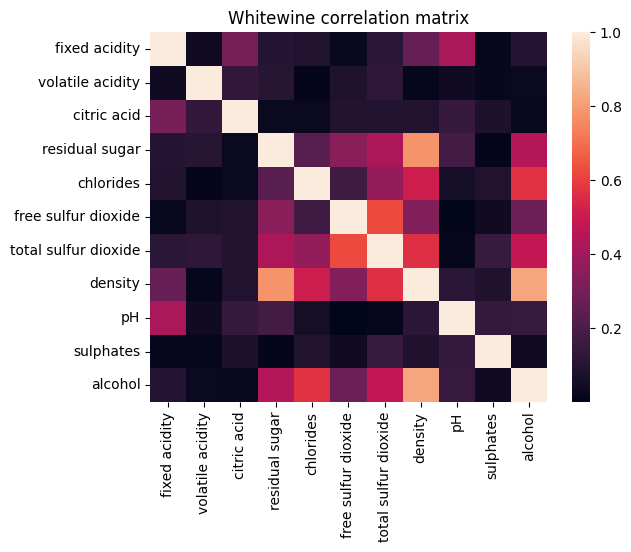

The total features in the data sets with size 11 are:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
The features  to be retained in red wine with size 11 are:
 ['sulphates', 'fixed acidity', 'density', 'total sulfur dioxide', 'citric acid', 'pH', 'alcohol', 'residual sugar', 'chlorides', 'volatile acidity', 'free sulfur dioxide']
The features  to be retained in white wine with size 10 are:
 ['sulphates', 'fixed acidity', 'total sulfur dioxide', 'citric acid', 'pH', 'alcohol', 'residual sugar', 'chlorides', 'volatile acidity', 'free sulfur dioxide']


In [ ]:
#Correlation matrix plot for red wine
corr_mat_red = data_redwine_train.corr(method = 'spearman')#Spearman used for assesing non-linear relationship among the variable

sns.heatmap(abs(corr_mat_red), annot= False)# Shows the abs value
plt.title('Redwine correlation matrix')
plt.show()

#Correlation matrix plot for white wine
corr_mat_white = data_whitewine_train.corr(method = 'spearman')#Spearman used for assesing non-linear relationship among the variable

sns.heatmap(abs(corr_mat_white), annot= False)# Shows the abs value
plt.title('Whitewine correlation matrix')
plt.show()

#As both red and white wine data set has same type of features, we are printing the rows header of corr matrix
row_head_red = corr_mat_red.index.tolist()

print(f'The total features in the data sets with size {len(row_head_red)} are:\n',row_head_red )

#Makes the values to zero whose correlation is < 0.8 For easy identification for redwine
#For redwine
mod_corr_mat_red = corr_mat_red.copy()

mod_corr_mat_red[abs(mod_corr_mat_red) < 0.8] = 0
corr_mat_red_array = mod_corr_mat_red.to_numpy()
indices = np.where(abs(corr_mat_red_array)>0.8)

rows_red = indices[0]
cols_red = indices[1]
row_head_red = mod_corr_mat_red.index.tolist()
col_head_red = mod_corr_mat_red.index.tolist()
pairs_red = [(row_head_red[row], col_head_red[col]) for row, col in zip(rows_red, cols_red)]
#Remove the duplicate pairs
unique_pairs_red = set()

for pair in pairs_red:
  unique_pairs_red.add(tuple(sorted(pair)))
for pair in unique_pairs_red:
  header_value = pair[0]
  for header in pair:
    mod_corr_mat_red.rename(columns = {header: header_value}, index = {header: header_value}, inplace = True)
row_head_red = mod_corr_mat_red.index.tolist()
col_head_red = mod_corr_mat_red.columns.tolist()
print(row_head_red)

row_headers_unique_red = list(set(row_head_red))

redwine_col_to_retain = row_headers_unique_red
print(f'The features  to be retained in red wine with size {len(redwine_col_to_retain)} are:\n',redwine_col_to_retain )

#Makes the values to zero whose correlation is < 0.8 For easy identification for white wine
#For redwine
mod_corr_mat_white = corr_mat_white.copy()
mod_corr_mat_white[abs(mod_corr_mat_white) < 0.8] = 0

corr_mat_white_array = mod_corr_mat_white.to_numpy()
indices = np.where(abs(corr_mat_white_array)>0.8)
rows_white = indices[0]
cols_white = indices[1]
row_head_white = mod_corr_mat_white.index.tolist()
col_head_white = mod_corr_mat_white.index.tolist()
pairs_white = [(row_head_white[row], col_head_white[col]) for row, col in zip(rows_white, cols_white)]



#Remove the duplicate pairs
unique_pairs_white = set()

for pair in pairs_white:
  unique_pairs_white.add(tuple(sorted(pair)))
for pair in unique_pairs_white:
  header_value = pair[0]
  for header in pair:
    mod_corr_mat_white.rename(columns = {header: header_value}, index = {header: header_value}, inplace = True)
row_head_white = mod_corr_mat_white.index.tolist()
col_head_white = mod_corr_mat_white.columns.tolist()

row_headers_unique_white = list(set(row_head_white))
whitewine_col_to_retain = row_headers_unique_white
print(f'The features  to be retained in white wine with size {len(whitewine_col_to_retain)} are:\n',whitewine_col_to_retain )




Observation:

The above code checks the corr coeff values inside the matrix and wherever corr coeff >0.8 between two features, one of them will be retained and one will be removed. The columns which will be retained in both red and white wine is printed. At the time when it is run,  white wine data has a feature which is having corr coeff > 0.8, and it is dropped due to high correlation, for red wine all have corr coeff <0.8.

**Preparing data**\
i) Eliminate useless columns, but in red wine there is no redundancy, no unvarying data, no missing entries. So we can't remove any variables in red wine. In white wine density and alcohol are correlated with 0.82 corr coeff. so we remove it.

ii) Converting discrete variables into one-hot-bit but no such thing in the given data

iii) Normalise the ranges to not to have disproportionate sway.

Mean of red data after normalisation:
 0     4.152703e-16
1    -1.111091e-16
2     2.559398e-14
3    -7.569308e-17
4     1.263866e-16
5    -1.358309e-15
6     4.777692e-16
7     1.527750e-17
8    -1.041648e-16
9     4.117981e-16
10   -7.638751e-17
dtype: float64
Standard deviation of red data after normalisation:
 0     1.000391
1     1.000391
2     1.000391
3     1.000391
4     1.000391
5     1.000391
6     1.000391
7     1.000391
8     1.000391
9     1.000391
10    1.000391
dtype: float64
Mean of white data after normalisation:
 0   -2.003955e-16
1    2.566151e-16
2    6.982107e-17
3   -3.300632e-16
4    1.735552e-15
5    5.485941e-17
6    7.344814e-17
7   -3.228091e-16
8   -5.368062e-16
9   -9.883762e-17
dtype: float64
Standard deviation of white data after normalisation:
 0    1.000128
1    1.000128
2    1.000128
3    1.000128
4    1.000128
5    1.000128
6    1.000128
7    1.000128
8    1.000128
9    1.000128
dtype: float64


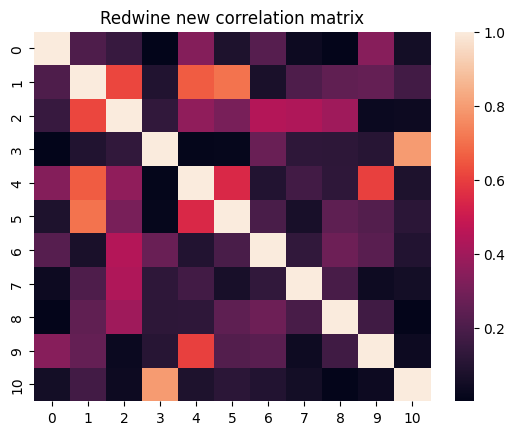

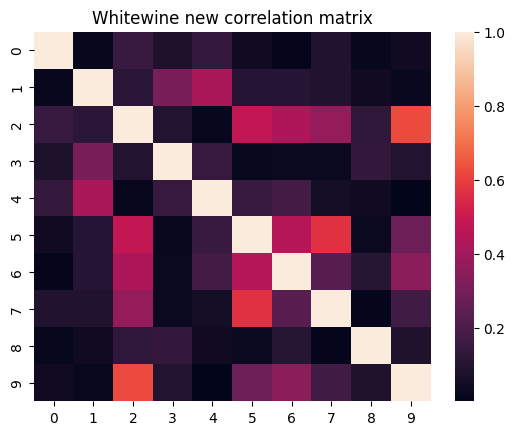

In [ ]:
#Normalising the data by shifting and scaling so that columns are zero mean and unit variance


scaler_red = preprocessing.StandardScaler()#Normalises the data for red is named as  scale_coeff_red

scaler_white = preprocessing.StandardScaler()#Normalises the data for white is named as scale_coeff_white

scaler_red.fit(data_redwine_train[redwine_col_to_retain])#It computes mean and standard deviation for redwine training data set

scaler_white.fit(data_whitewine_train[whitewine_col_to_retain])#It computes mean and standard deviation for whitewine training data set
# col_names_red = data_redwine_train[redwine_col_to_retain].columns
# col_names_white = data_whitewine_train[whitewine_col_to_retain].columns
train_X_red = pd.DataFrame(scaler_red.transform(data_redwine_train[redwine_col_to_retain]))#Uses mean and std deviation
train_Y_red = pd.DataFrame(y_red_train)

print("Mean of red data after normalisation:\n",train_X_red.mean())#Gives the average value of normalised tarianing data
print("Standard deviation of red data after normalisation:\n",train_X_red.std())

train_X_white = pd.DataFrame(scaler_white.transform(data_whitewine_train[whitewine_col_to_retain]))#Uses mean and std deviation
train_Y_white = pd.DataFrame(y_white_train)


print("Mean of white data after normalisation:\n",train_X_white.mean())#Gives the average value of normalised tarianing data
print("Standard deviation of white data after normalisation:\n",train_X_white.std())#Prints the standard deviation of white wine data

corrMat_red  = train_X_red.corr(method = 'spearman')#Checking correlation again for redwine
corrMat_white = train_X_white.corr(method = 'spearman')#Checking correlation again for redwine

#Plots the new correlation matrix for redwine data
sns.heatmap(abs(corrMat_red), annot= False)# Shows the abs value
plt.title('Redwine new correlation matrix')
plt.show()

#Plots the new correlation matrix for white wine
sns.heatmap(abs(corrMat_white), annot= False)# Shows the abs value
plt.title('Whitewine new correlation matrix')
plt.show()


Observations:

Standard deviation is 1, mean is nearly zero after the normalisation

In [ ]:
#Normalise test data using the same scaler coefficients which was fitted on training

#Testing on redwine
test_X_red = pd.DataFrame(scaler_red.transform(data_redwine_test[redwine_col_to_retain]),columns=redwine_col_to_retain )
test_Y_red = pd.DataFrame(y_red_test)
display(test_X_red)#To display the redwine test data used with validation set of white wine
print(test_X_red.mean())

test_X_white = pd.DataFrame(scaler_white.transform(data_whitewine_test[whitewine_col_to_retain]),columns=whitewine_col_to_retain)
test_Y_white = pd.DataFrame(y_white_test)
display(test_X_white)#To display the redwine test data used with validation set of white wine
print(test_X_white.mean())



sulphates  fixed acidity   density  total sulfur dioxide  citric acid  \
0    -0.000134      -0.361860  0.175732             -0.019957    -0.985153   
1    -1.031438      -0.303841 -0.417191              1.680668    -0.524492   
2     1.833295       1.378715  1.954501             -0.384376    -0.268569   
3    -0.687670       0.102293  0.660851              0.344463     0.192092   
4    -0.343902      -0.942051 -1.064016             -0.384376    -0.166200   
..         ...            ...       ...                   ...          ...   
315  -0.172018      -0.884032 -0.751384             -0.414744    -1.394630   
316  -1.203322      -1.000070 -0.643580              0.936645    -1.394630   
317  -0.744965      -0.013745 -0.330948             -0.262903    -0.115015   
318   0.171750       0.276351 -0.708262             -0.596954     0.601569   
319  -0.687670       0.450408  0.660851             -0.991742    -1.189891   

           pH   alcohol  residual sugar  chlorides  volatile acidity  \
0   -0.465393 -0.777453       -0.038651   0.518158          0.164286   
1    0.508915 -0.872484       -0.665729  -0.130756         -0.170525   
2   -0.205577 -0.492358        0.100700   0.376208          0.778108   
3    0.119192 -0.587390       -0.212839  -0.211871         -0.393733   
4    0.508915  0.172862       -0.596054  -0.232149         -0.393733   
..        ...       ...             ...        ...               ...   
315  0.833684  0.838083        0.100700   0.700665          0.610702   
316 -0.725208 -0.872484        1.215505   0.092308          0.554900   
317 -1.049977 -0.587390       -0.247677   0.599272          0.387494   
318 -1.049977  0.743051       -0.387028   0.234258         -1.453971   
319 -0.140623 -0.682421       -0.665729  -0.211871          1.308227   

     free sulfur dioxide  
0              -0.181976  
1               0.497011  
2               0.109019  
3               1.563989  
4               0.206017  
..                   ...  
315            -0.084978  
316             3.406953  
317            -0.666966  
318             0.400013  
319            -1.151956  

[320 rows x 11 columns]

sulphates              -0.053669
fixed acidity          -0.011751
density                -0.073532
total sulfur dioxide   -0.028735
citric acid            -0.038238
pH                     -0.017414
alcohol                 0.023188
residual sugar         -0.058029
chlorides              -0.099451
volatile acidity       -0.076360
free sulfur dioxide    -0.000559
dtype: float64


sulphates  fixed acidity  total sulfur dioxide  citric acid        pH  \
0     0.882404      -1.024480              0.261490     0.645294 -0.661230   
1     0.354121      -1.735065             -0.237770    -1.442522  0.071302   
2    -0.526350       0.278258             -0.332867     0.478269  0.604053   
3    -0.174162       0.515119              0.237715     0.144218 -0.061886   
4     0.970452      -0.432327             -1.117418     0.060705  0.604053   
..         ...            ...                   ...          ...       ...   
975   3.347725      -0.077034             -0.285318     0.728807 -0.661230   
976   0.442168       0.515119             -0.737029     1.313395  0.337677   
977  -0.526350      -1.142911              0.332812    -1.024959  0.604053   
978   0.442168       0.751981              0.309038    -0.189832 -0.727824   
979  -0.174162      -0.195465              0.332812     0.478269  2.069117   

      alcohol  residual sugar  chlorides  volatile acidity  \
0    0.372905        0.846388   0.103968          0.104951   
1    2.191980       -0.729900  -0.446626          2.467321   
2    1.377469       -0.846662  -0.446626         -0.288777   
3    0.155702       -0.943963   0.379265          0.006519   
4    1.214566       -0.146089  -0.079563          0.400248   
..        ...             ...        ...               ...   
975  0.318604       -1.021805  -0.033680         -0.682505   
976  0.237153       -0.282312  -0.813688         -0.190345   
977 -0.821712        1.177214  -0.538391         -0.190345   
978 -0.984614        0.486372   0.425148          0.104951   
979 -0.414456       -1.021805   0.149851         -0.584073   

     free sulfur dioxide  
0               1.193741  
1              -0.065642  
2              -0.305524  
3              -0.245554  
4              -0.485436  
..                   ...  
975            -0.665348  
976            -0.185583  
977             0.054300  
978            -0.905230  
979            -0.545407  

[980 rows x 10 columns]

sulphates               0.002921
fixed acidity          -0.060720
total sulfur dioxide    0.042718
citric acid             0.060961
pH                     -0.034161
alcohol                 0.022091
residual sugar         -0.057664
chlorides               0.008785
volatile acidity       -0.053946
free sulfur dioxide     0.063999
dtype: float64


# c) Train, validate varying at least one hyperparameter, and test at least two types of models: [2]
i. Random forest
ii. Support vector regression with RBF kernel
iii. Neural network with single hidden layer (output layer should have linear activation)

**Using five-fold cross-validation to find the reasonable hyper-parameter settings.**

Instead of splitting the entire data into 3 subsets for training, validation and test it is split only to two training(80%) and testing(20%). It is used gridsearch which performs hyper parameter tuning, by systematiclaly searching the optimal combination of hyperpparameters that are set before the training process. So, the same grid search is used for the 3 models in question (c)

#The links used for  doing the question 3 are
#https://scikit-learn.org/stable/modules/grid_search.html
#https://in.mathworks.com/help/stats/understanding-support-vector-machine-regression.html
#https://stackoverflow.com/questions/20095187/regression-trees-or-random-forest-regressor-with-categorical-inputs
#https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb
#https://chat.openai.com/c/501f7459-f29f-46f1-9e7f-c474a6522a84

In [ ]:
#Let's use automated grid search over a range of hyperparameters
from sklearn.model_selection import GridSearchCV #GridsearchCV is used for hyperparameter tuning, evaluates each combination of hyperparameters using crossvalidation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn import svm

print('--------------------------------')
print('Training SVR using GridSearchCV')#SVC is a type of SVM for classification tasks
#SVR is used for regression tasks
print('--------------------------------')

# #Training, Validation using Support vector regression with RBF kernel
# #Let the hyperparameter be the regularisation parameter C: [0.1,0.5,1,2,10]. higher values of C leads to smaller margin and overfitting; Lower values of C will lead to larger margin and underfitting
#and kernel width 'gamma': [0.1,0.01,0.001]


##***************************************#
##Modeling the red wine data using SVR##
##**************************************#
scoring = 'neg_mean_squared_error'
svr_model = svm.SVR(kernel= 'rbf') #one vs rest is taken as multi class parameter
hp = {'C': [0.1,0.2,1,5,10] , 'gamma': [0.1,0.01,0.001]}#, 'epsilon': [0.01,0.1,0.2]
grid_search_svr_red = GridSearchCV(estimator = svr_model, param_grid = hp, cv =5, scoring = scoring)
grid_search_svr_red.fit(train_X_red, train_Y_red.values.ravel())#Fitting the model

#Finding the best parameters for red wine data
best_params_red = grid_search_svr_red.best_params_
best_score_red = grid_search_svr_red.best_score_
best_svr_model_red = grid_search_svr_red.best_estimator_

print('Best parameters for red wine:')
print(best_params_red)
y_pred_red = best_svr_model_red.predict(test_X_red)#Predicting the output for the test input
print('The Mean square error for red model:\n', mean_squared_error(test_Y_red,y_pred_red))

##***************************************#
##Modeling the white wine data using SVR##
##**************************************#

#Using grid search for the data which is splitted as training
grid_search_svr_white = GridSearchCV(estimator = svr_model, param_grid = hp, cv =5, scoring = scoring)
grid_search_svr_white.fit(train_X_white, train_Y_white.values.ravel())#Fitting the model

#Finding the best parameters for white wine data
best_params_white = grid_search_svr_white.best_params_
best_score_white = grid_search_svr_white.best_score_
best_svr_model_white = grid_search_svr_white.best_estimator_

print('Best parameters for white wine:')
print(best_params_white)

y_pred_white = best_svr_model_white.predict(test_X_white)#Predicting the output for the test input
print('The Mean square error for white model:\n', mean_squared_error(test_Y_white,y_pred_white))


--------------------------------
Training SVR using GridSearchCV
--------------------------------
Best parameters for red wine:
{'C': 1, 'gamma': 0.1}
The Mean square error for red model:
 0.35081528985634935
Best parameters for white wine:
{'C': 5, 'gamma': 0.1}
The Mean square error for white model:
 0.4719137071229591


In [ ]:
#Random forest with hyper haparameters as number of trees and max depth of trees
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

##***************************************#
##Modeling the red wine data using RF##
##**************************************#
scoring = 'neg_mean_squared_error'
rf_model = RandomForestRegressor()
hp = {'max_depth': [2,5,10,20],'n_estimators': [10,20,30,50,100]}

#Using grid search for the data which is splitted as training
grid_search_rf_red = GridSearchCV(estimator = rf_model, param_grid = hp, cv =5, scoring = scoring)
grid_search_rf_red.fit(train_X_red, train_Y_red.values.ravel())#Fitting the model

#Finding the best parameters for white wine data
best_params_red = grid_search_rf_red.best_params_
best_score_red = grid_search_rf_red.best_score_
best_rf_model_red = grid_search_rf_red.best_estimator_

print('Best parameters for red wine:')
print(best_params_red)

y_pred_red = best_rf_model_red .predict(test_X_red)#Predicting the output for the test input
print('The mean square error for red wine data:\n', mean_squared_error(test_Y_red,y_pred_red))


##***************************************#
##Modeling the white wine data using RF##
##**************************************#
#Using grid search for the data which is splitted as training
grid_search_rf_white = GridSearchCV(estimator = rf_model, param_grid = hp, cv =5, scoring = scoring)
grid_search_rf_white.fit(train_X_white, train_Y_white.values.ravel())#Fitting the model

#Finding the best parameters for white wine data
best_params_white = grid_search_rf_white.best_params_
best_score_white = grid_search_rf_white.best_score_
best_rf_model_white = grid_search_rf_white.best_estimator_

print('Best parameters for white wine:')
print(best_params_white)

y_pred_white = best_rf_model_white.predict(test_X_white)#Predicting the output for the test input
print('The mean square error for white wine data:\n', mean_squared_error(test_Y_white,y_pred_white ))



Best parameters for red wine:
{'max_depth': 20, 'n_estimators': 100}
The mean square error for red wine data:
 0.3142380552006642
Best parameters for white wine:
{'max_depth': 20, 'n_estimators': 100}
The mean square error for white wine data:
 0.3538059536175574


It is given in the question that output layer should have linear activation, so regression model of neural networks is done. Mean square error is taken as metric since it is regression model.

In [ ]:
#Neural network with hyper haparameters as number of neurons in hidden layer and max depth of trees
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(hidden_layer_sizes=(100,), max_iter= 1000, activation='relu', solver = 'adam', random_state = 42)
#The hyper parameters are considered to be alpha and learning rate
hp = {'alpha':[0.001,0.01,0.1,0.5], 'learning_rate_init':[0.001,0.01,0.1]}

##***************************************#
##Modeling the red wine data using NN##
##**************************************#
grid_search_nn_red = GridSearchCV(estimator = nn_regressor, param_grid = hp, cv =5, scoring = scoring)
grid_search_nn_red.fit(train_X_red, train_Y_red.values.ravel())#Fitting the model
#Finding the best parameters for white wine data
best_params_red = grid_search_nn_red.best_params_
best_score_red = grid_search_nn_red.best_score_
best_nn_model_red = grid_search_nn_red.best_estimator_
y_pred_red = best_nn_model_red.predict(test_X_red)#Predicting the output for the test input
print('Best parameters for white wine with NN model:')
print(best_params_red)
print('The mean square error for red wine data with NN model:\n', mean_squared_error(test_Y_red,y_pred_red ))


##***************************************#
##Modeling the white wine data using NN##
##**************************************#
grid_search_nn_white = GridSearchCV(estimator = nn_regressor, param_grid = hp, cv =5, scoring = scoring)
grid_search_nn_white.fit(train_X_white, train_Y_white.values.ravel())#Fitting the model
#Finding the best parameters for white wine data
best_params_white = grid_search_nn_white.best_params_
best_score_white = grid_search_nn_white.best_score_
best_nn_model_white = grid_search_nn_white.best_estimator_
y_pred_white = best_nn_model_white.predict(test_X_white)#Predicting the output for the test input
print('Best parameters for white wine with NN model:')
print(best_params_white)
print('The mean square error for white wine data with NN model:\n', mean_squared_error(test_Y_white,y_pred_white ))



Best parameters for white wine with NN model:
{'alpha': 0.5, 'learning_rate_init': 0.001}
The mean square error for red wine data with NN model:
 0.34922768395361475
Best parameters for white wine with NN model:
{'alpha': 0.5, 'learning_rate_init': 0.001}
The mean square error for white wine data with NN model:
 0.4871694816901801


Observation : The comparision of Mean square error in the 3 models is given below
--------------------------------
Data set| Model |MSE
--------|-------|------------------
Red   | SVR|  0.351
Red   | RF|  0.314
Red   | NN|  0.349
White | SVR  | 0.472
White | RF  | 0.353
White | NN  | 0.487

# d. Search the net about how to determine the importance of each variable, and find the importance in the final models tried. Comment on whether the same variables are important for different models.

https://machinelearningmastery.com/calculate-feature-importance-with-python/ \\
https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c
\\ http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/#example-1-feature-importance-for-classifiers

Feature importance can, therefore, be determined by comparing the size of these coefficients to each other. By looking at the SVM coefficients it is, therefore, possible to identify the main features used in classification and get rid of the not important ones (which hold less variance)



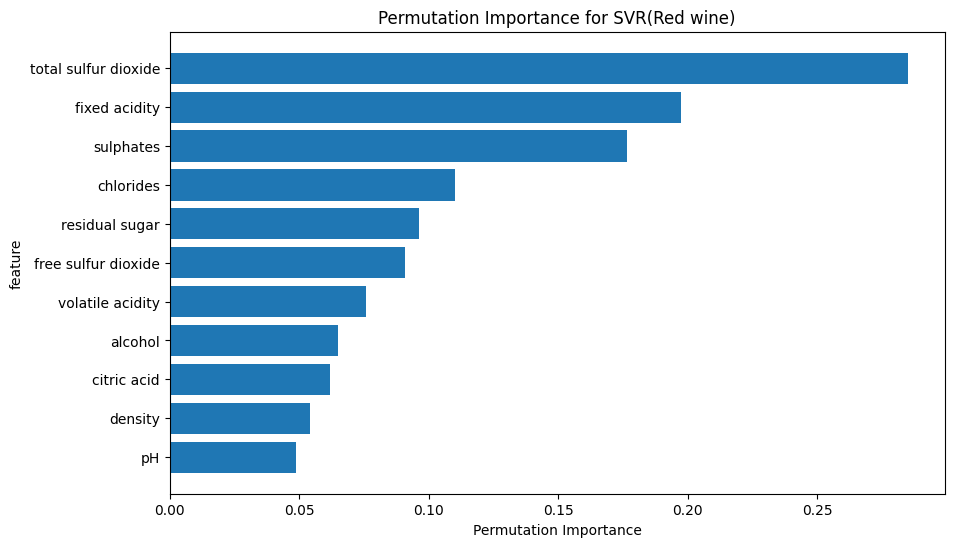

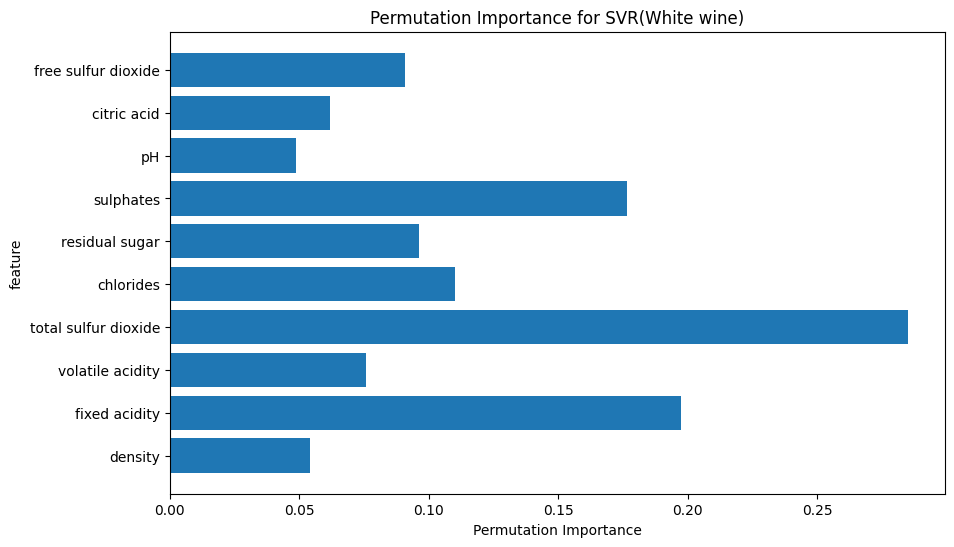

In [ ]:
#Feature importance with SVR model
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category = UserWarning)
perm_imp_svr_red = permutation_importance(best_svr_model_red, train_X_red, train_Y_red)
fe_imp_svr_red = perm_imp_svr_red.importances_mean
ftr_names = np.array(data_redwine.columns)
plt.figure(figsize=(10,6))
sorted_idx = fe_imp_svr_red.argsort()
plt.barh(ftr_names[sorted_idx],fe_imp_svr_red[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("feature")
plt.title('Permutation Importance for SVR(Red wine)')
plt.show()

perm_imp_svr_white = permutation_importance(best_svr_model_white, train_X_white, train_Y_white)
fe_imp_svr_white = perm_imp_svr_white.importances_mean
ftr_names = np.array(data_whitewine.columns)
plt.figure(figsize=(10,6))
sorted_idx = fe_imp_svr_white.argsort()
plt.barh(ftr_names[sorted_idx],fe_imp_svr_red[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("feature")
plt.title('Permutation Importance for SVR(White wine)')
plt.show()

In [ ]:
#Prints the features which are important in white wine and red wine models
print(fe_imp_svr_white )
print(fe_imp_svr_red)

[0.13323472 0.13994433 0.22751866 0.16217236 0.16038131 0.43583568
 0.14578282 0.11052447 0.20307856 0.19684704]


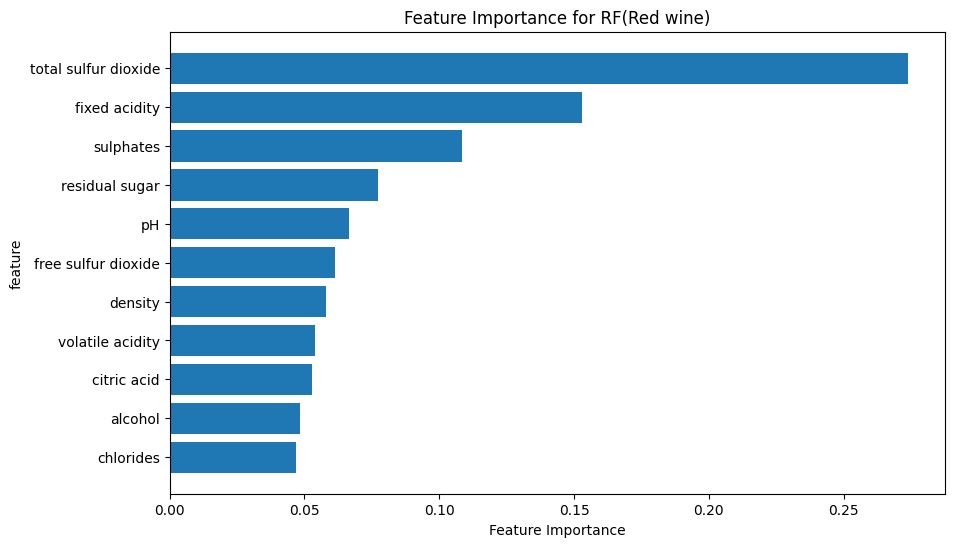

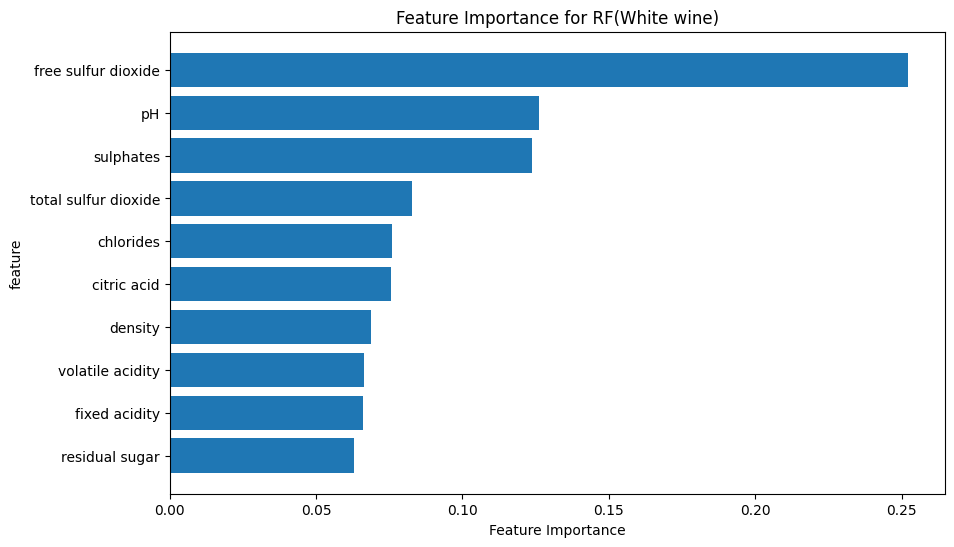

In [ ]:
#Importance of each variable for red wine data on RF model
fe_imp_rf_red = best_rf_model_red.feature_importances_
ftr_names = np.array(data_redwine.columns)
#plotting the feature importances
plt.figure(figsize=(10,6))
sorted_idx = fe_imp_rf_red.argsort()
plt.barh(ftr_names[sorted_idx],fe_imp_rf_red[sorted_idx])#Feature importance in it's sorted order to find whether the same feature is important for all models
plt.xlabel("Feature Importance")
plt.ylabel("feature")
plt.title('Feature Importance for RF(Red wine)')
plt.show()

#Importance of each variable for white wine data on RF model
fe_imp_rf_white = best_rf_model_white.feature_importances_
ftr_names = np.array(data_whitewine.columns)
#plotting the feature importances
plt.figure(figsize=(10,6))
sorted_idx = fe_imp_rf_white.argsort()##Feature importance in it's sorted order to find whether the same feature is important for all models
plt.barh(ftr_names[sorted_idx],fe_imp_rf_white[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("feature")
plt.title('Feature Importance for RF(White wine)')
plt.show()

From the above models, the importance of features is  same in different models. It is not varying from one to other.

# e. Test the model for red with data from white and vice versa, and comment on whether the model for red wines is applicable to white wines and versa or not.

In [ ]:
print(redwine_col_to_retain)

['sulphates', 'fixed acidity', 'density', 'total sulfur dioxide', 'citric acid', 'pH', 'alcohol', 'residual sugar', 'chlorides', 'volatile acidity', 'free sulfur dioxide']


In [ ]:
#Predicted output for white data tested on red data model trained with SVR
y_white_svr_red = best_svr_model_red.predict(data_whitewine_test)
#The mean square in the above case
print("Mean squared error of best SVR model for White wine data tested on RED DATA MODEL:\n"
           , mean_squared_error(y_white_svr_red,test_Y_white))

#Predicted output for white data tested on red data model trained with Rf
y_white_rf_red = best_rf_model_red.predict(data_whitewine_test)
#The mean square in the above case
print("\nMean squared error of best RF model for White wine data tested on RED DATA MODEL:\n"
           , mean_squared_error(y_white_rf_red,test_Y_white))

#Predicted output for white data tested on red data model trained with NN
y_white_nn_red = best_nn_model_red.predict(data_whitewine_test)
#The mean square in the above case
print("\nMean squared error of best NN model for White wine data tested on RED DATA MODEL:\n"
           , mean_squared_error(y_white_nn_red,test_Y_white))

#Predicted output for red data tested on white data model trained with SVR
y_red_svr_white = best_svr_model_white.predict(test_X_red[whitewine_col_to_retain])
#The mean square in the above case
print("\nMean squared error of best SVR model for red wine data tested on WHITE WINE MODEL:\n"
            ,mean_squared_error(y_red_svr_white,test_Y_red))

#Predicted output for red data tested on white data model trained with RF
y_red_rf_white = best_rf_model_white.predict(test_X_red[whitewine_col_to_retain])
#The mean square in the above case
print("\nMean squared error of best RF model for red wine data tested on WHITE WINE MODEL:\n"
            ,mean_squared_error(y_red_rf_white,test_Y_red))

#Predicted output for red data tested on white data model trained with NN
y_red_nn_white = best_nn_model_white.predict(test_X_red[whitewine_col_to_retain])
#The mean square in the above case
print("\nMean squared error of best NN model for red wine data tested on WHITE WINE MODEL:\n"
            ,mean_squared_error(y_red_nn_white,test_Y_red))



Mean squared error of best SVR model for White wine data tested on RED DATA MODEL:
 1.0066691085105919

Mean squared error of best RF model for White wine data tested on RED DATA MODEL:
 1.0105704081632654

Mean squared error of best NN model for White wine data tested on RED DATA MODEL:
 5426.1243666140645

Mean squared error of best SVR model for red wine data tested on WHITE WINE MODEL:
 0.6437551864986275

Mean squared error of best RF model for red wine data tested on WHITE WINE MODEL:
 0.5639544260133201

Mean squared error of best NN model for red wine data tested on WHITE WINE MODEL:
 0.5041994100815351


Observation : The comparision of Mean square error in the 3 models is given below
--------------------------------
Trained Data set| Test Data set | Model |MSE
--------|--------|----------|------------------           
Red   | White |SVR|  1.00
Red   | White| RF|  1.01
Red   | White | NN|  5426
White | Red| SVR  | 0.644
White | Red | RF  | 0.564
White | Red | NN  | 0.504


--------------------------------
Data set| Model |MSE
--------|-------|------------------
Red   | SVR|  0.314
Red   | RF|  0.308
Red   | NN|  0.349
White | SVR  | 0.353
White | RF  | 0.357
White | NN  | 0.487

**From the above the Mean square error is more when one data is tested on other data model. So if we use like this there will be more error in the predicted output.**


## . Classification:
# a. Download the data to predict Down syndrome in mice from https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression. The prediction problem is to either predict the genotype (binary) using the gene expression variables from DYRK1A_N to CaNA_N

The links used in this question are
https://chat.openai.com/c/2e99751b-a79e-4de0-944e-829ebc63fc5b
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb
The same links of Question1 are also used for this question too as it is also same except that it is done as a classification problem.

In [ ]:
#Downloading the data to predict Down syndrome in mice from https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression.

data_mice = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls")#reading the down syndrome xls data of mice from the URL mentioned above
data_mice_copy = data_mice.copy()
numeric_cols = data_mice.select_dtypes(include=['float64', 'int64']).columns#Selects the columns with numeric columns in the given data set, in our data set we have only float64 and int64
print(data_mice.columns)


Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')


In [ ]:
print('-------------------------------------------------------------------------------------------')
print('The diversity in the features of down syndrome of mice data is as follows after imputation:')
print('-------------------------------------------------------------------------------------------')
for col in data_mice.columns.values: #For every column
  list_vals = pd.unique(data_mice[col]) #Creates list of unique values
  print(col + ' is of type' + str(data_mice[col].dtypes) + ', has ' + str(len(list_vals))+ ' unique values, and ' + str(np.sum(pd.isnull(data_mice[col])))+ ' null entries')
  if(len(list_vals)<10): #If column has less than 10 unique values print the values
    list_str = ''
    for i in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[i]) + ','
    print(' These are: '+list_str[0:len(list_str)-2])

-------------------------------------------------------------------------------------------
The diversity in the features of down syndrome of mice data is as follows after imputation:
-------------------------------------------------------------------------------------------
MouseID is of typeobject, has 1080 unique values, and 0 null entries
DYRK1A_N is of typefloat64, has 1078 unique values, and 3 null entries
ITSN1_N is of typefloat64, has 1077 unique values, and 3 null entries
BDNF_N is of typefloat64, has 1078 unique values, and 3 null entries
NR1_N is of typefloat64, has 1078 unique values, and 3 null entries
NR2A_N is of typefloat64, has 1078 unique values, and 3 null entries
pAKT_N is of typefloat64, has 1077 unique values, and 3 null entries
pBRAF_N is of typefloat64, has 1076 unique values, and 3 null entries
pCAMKII_N is of typefloat64, has 1078 unique values, and 3 null entries
pCREB_N is of typefloat64, has 1078 unique values, and 3 null entries
pELK_N is of typefloat64, h

observation:
All data types are float64 for the features, int 64 for Genotype. but some features have more nulls. so to eliminate the missing values imputation is done
classification parameter is considered as class.

There are several ways to deal with missing values in a data set, like SimpleImputer and IterativeImputer. In multivariate feature imputation, at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. The process is repeated for each feature. Here we are using Iterative imputer on the given data set with 100 iterations

https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state= 42)#Calling the iterator function for 10 iterations
imputed_data = imputer.fit_transform(data_mice.loc[:,'DYRK1A_N' : 'CaNA_N'])#Imputes the feature matrix

imputed_df = pd.DataFrame(imputed_data)

In [ ]:
#Features in the given data (variables)
ftrs_mice = imputed_df
print(ftrs_mice.columns)
data_mice['class'] = data_mice['class'].replace({'c-CS-m':0,'c-SC-m':1,'c-CS-s':2,'c-SC-s':3,'t-CS-m':4,'t-SC-m':5,'t-CS-s':6,'t-SC-s':7})
tgt = data_mice['class']#Prediction problem is to predict the class

#Finding the number of missing values of each variable
missing_vals = imputed_df.isnull().sum()
print("The no.of null entries in the data is :\n",np.count_nonzero(missing_vals))


#Splitting the data set into training and validation
#Creating a split such as 80-20

data_mice_train, data_mice_valid , y_train, y_valid  = train_test_split(ftrs_mice, tgt, train_size = 0.8)

RangeIndex(start=0, stop=77, step=1)
The no.of null entries in the data is :
 0


Observation:
After imputation there are no null values in the data set \\



Observation:
There are many null entries in some of the variables. We will impute the variables to eliminate null entries.

---------------------------------------------
Histogram for each column of Mice data set
---------------------------------------------


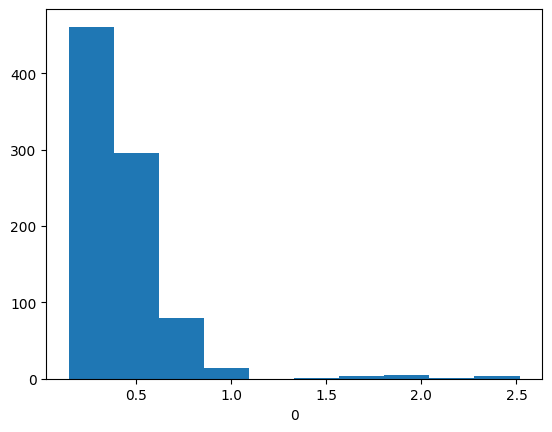

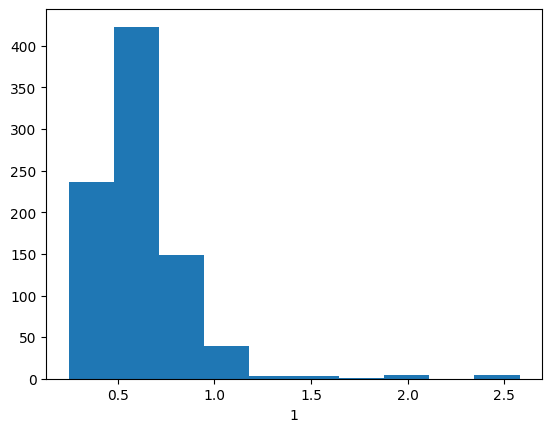

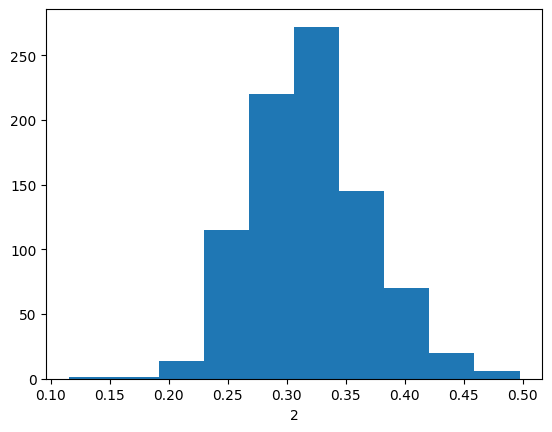

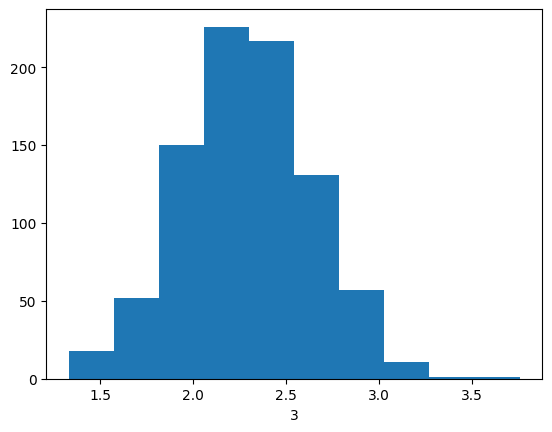

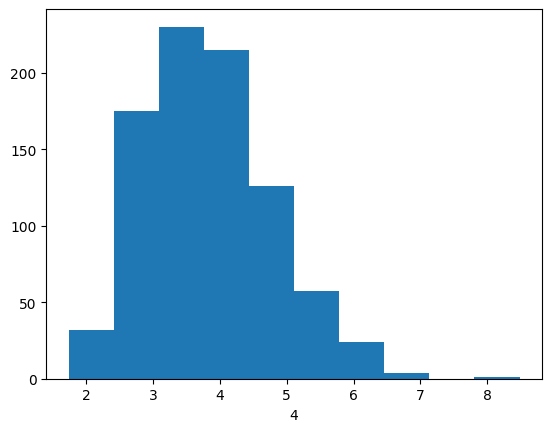

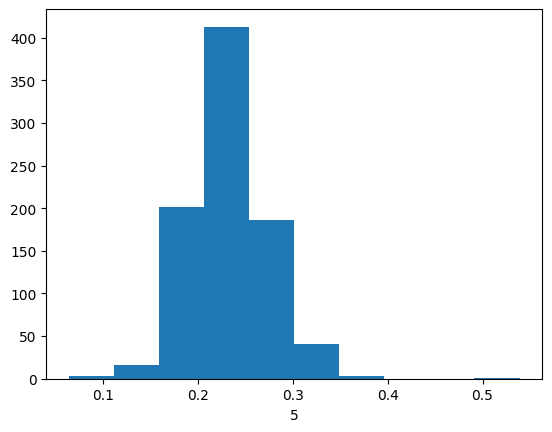

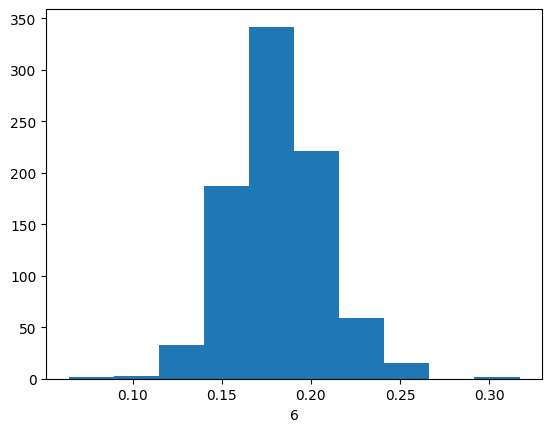

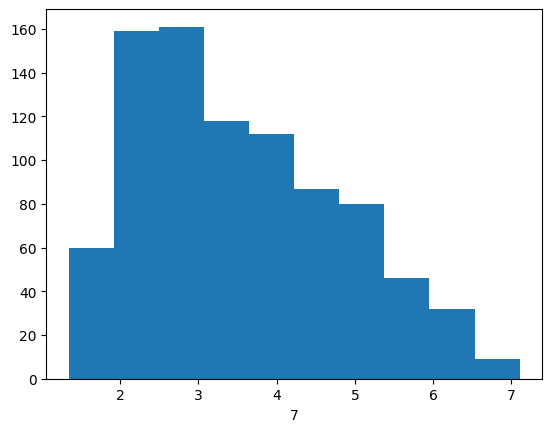

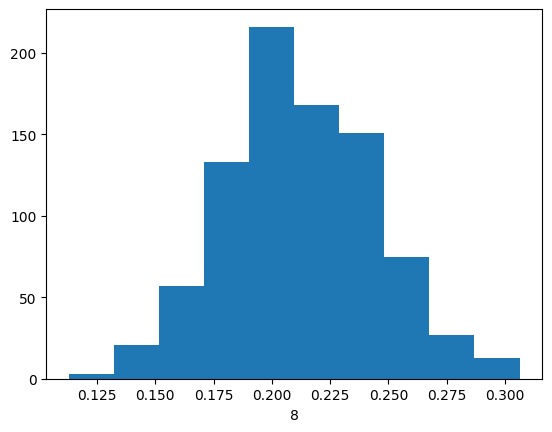

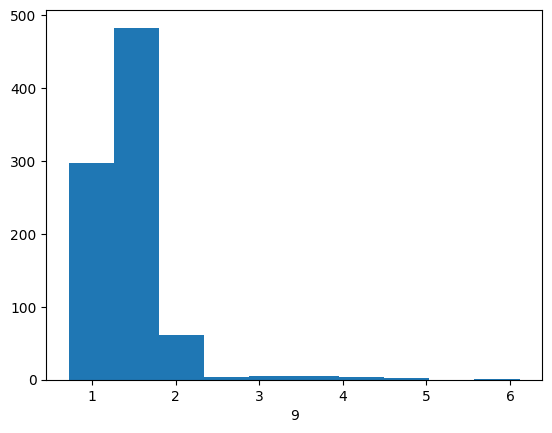

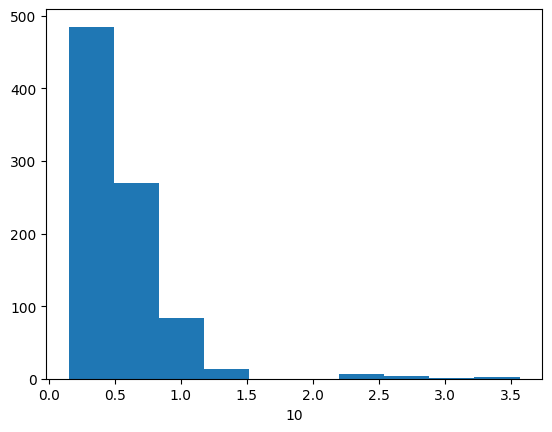

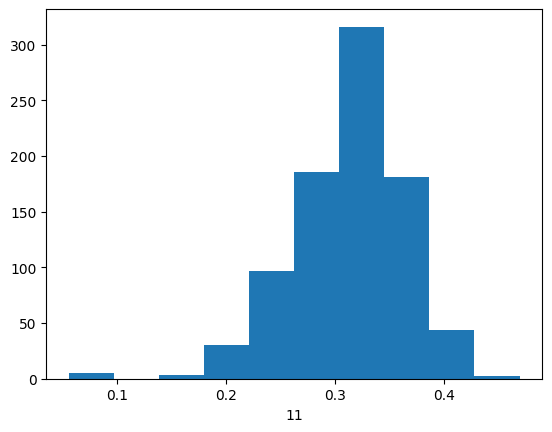

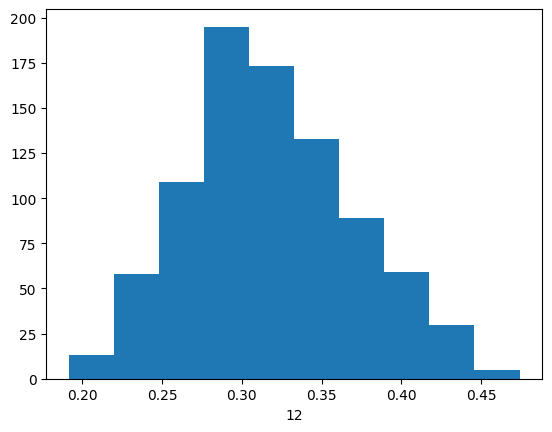

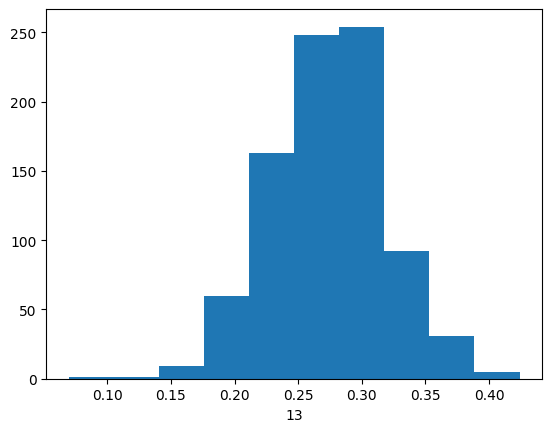

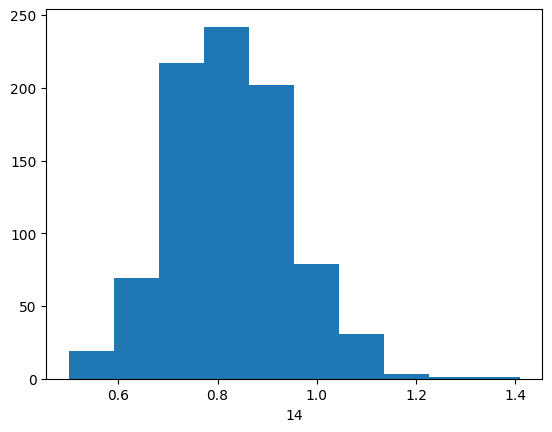

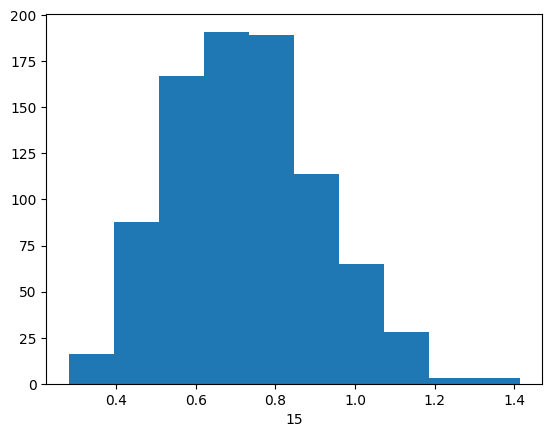

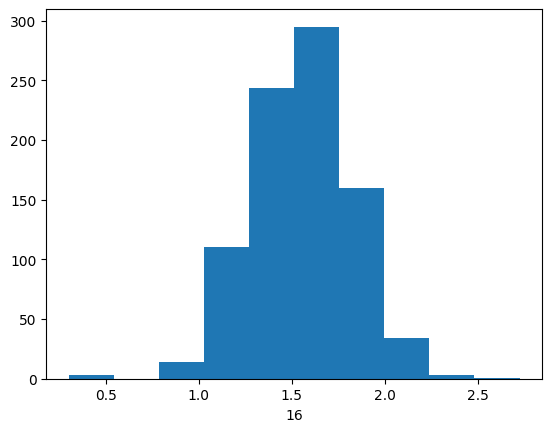

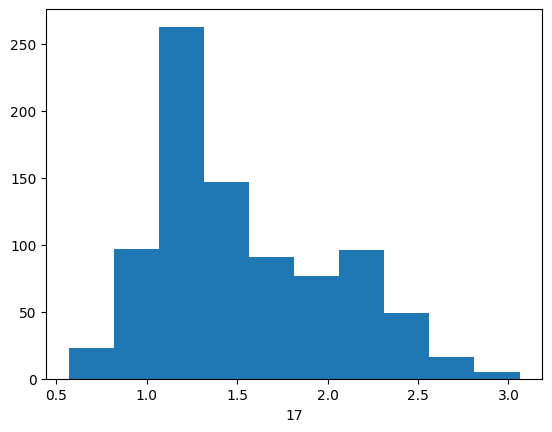

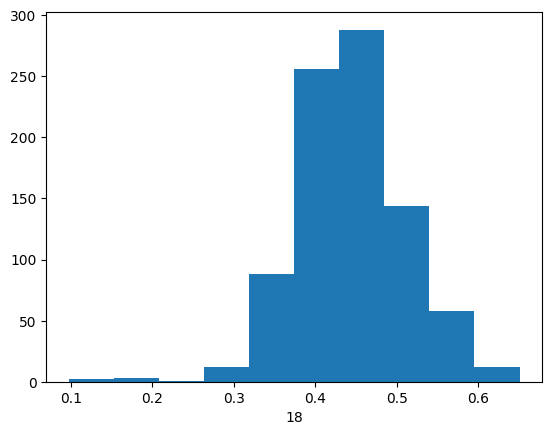

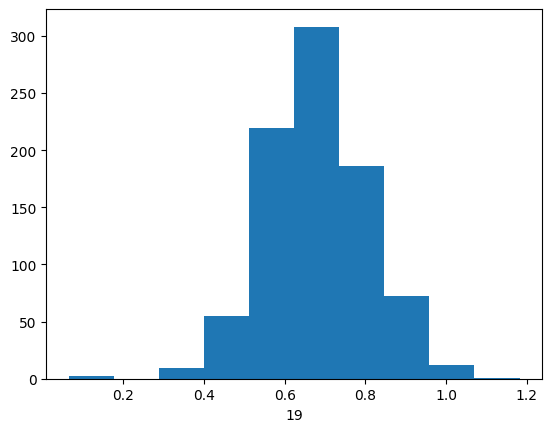

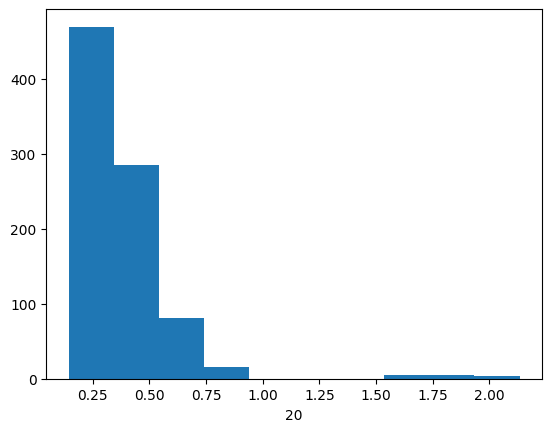

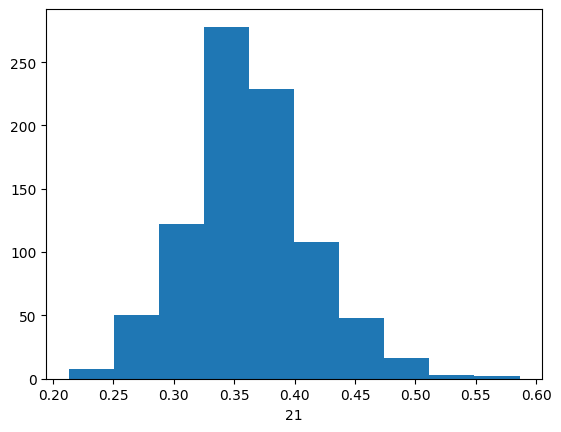

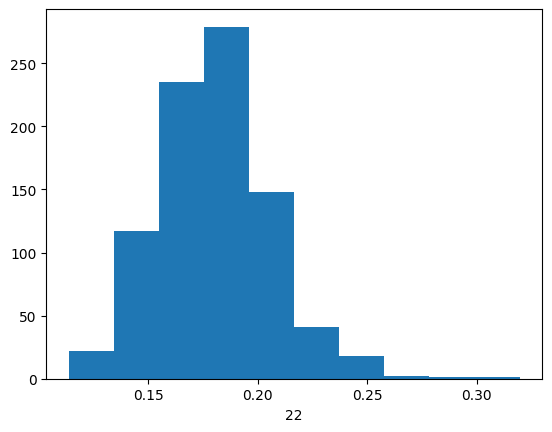

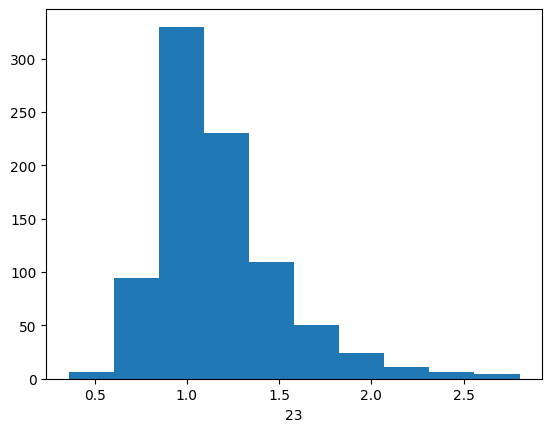

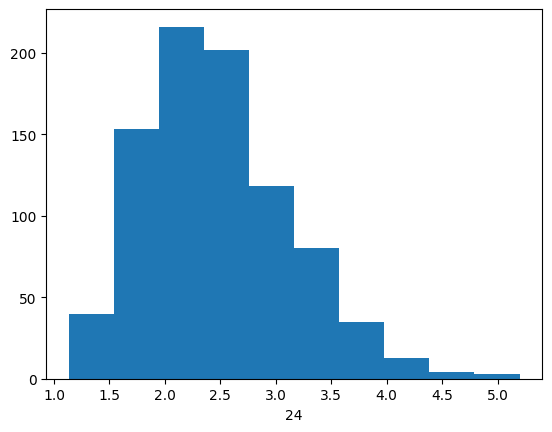

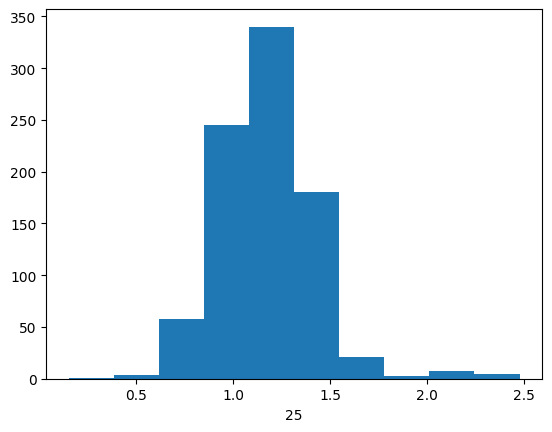

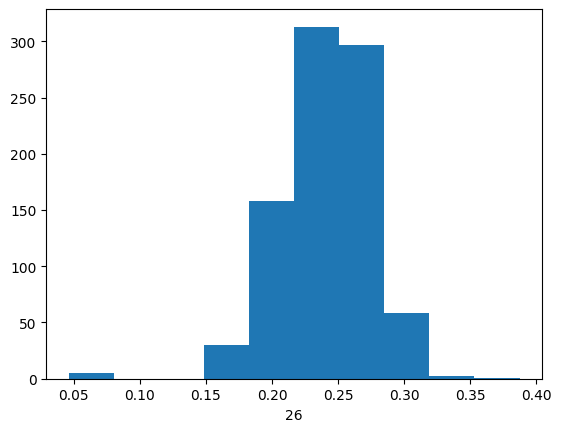

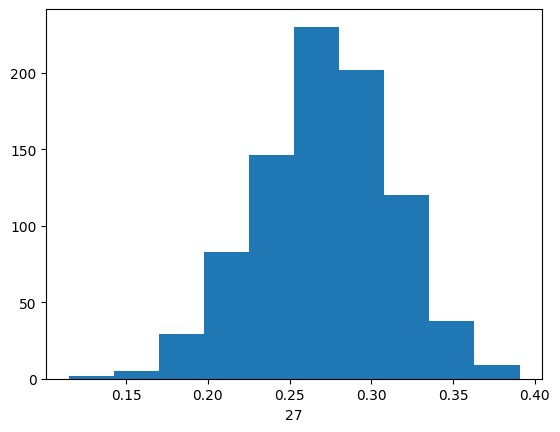

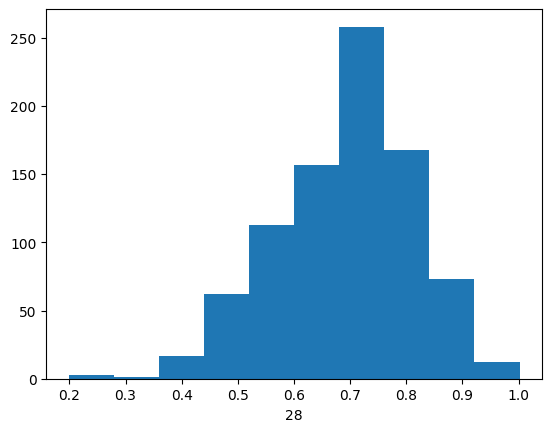

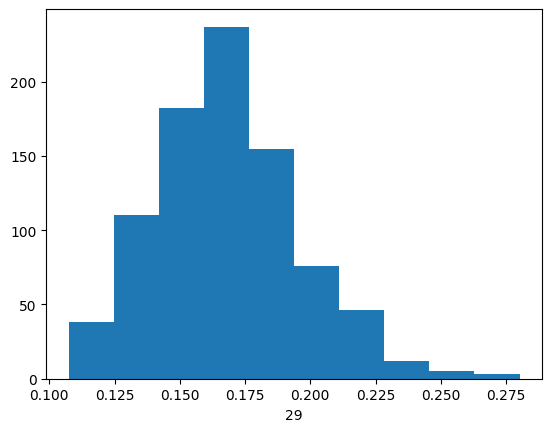

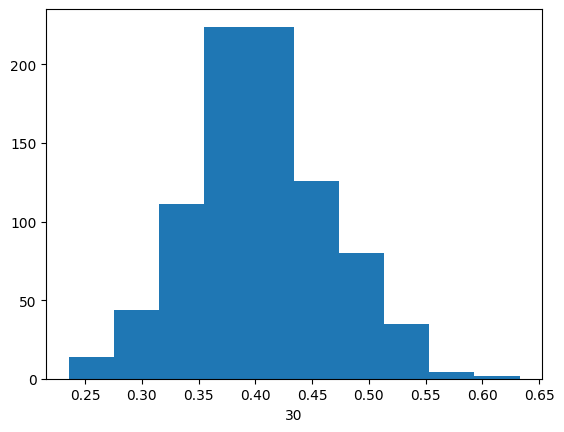

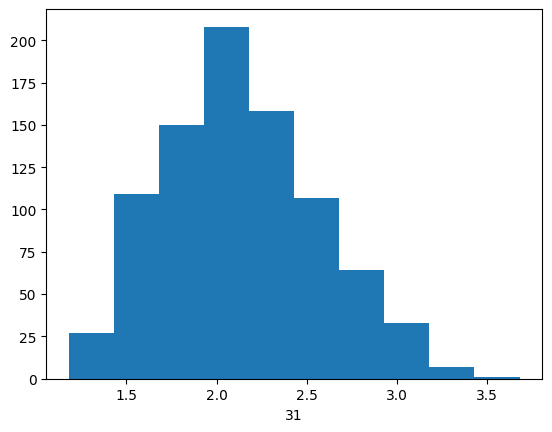

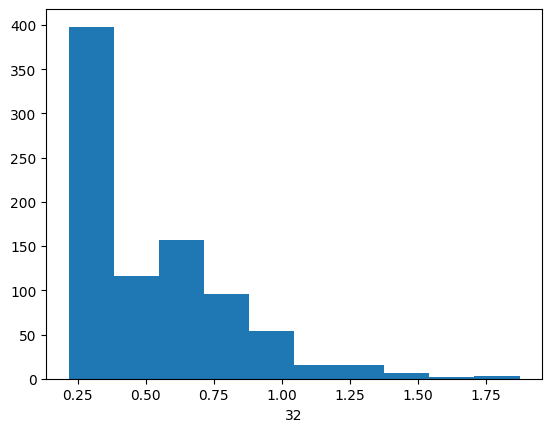

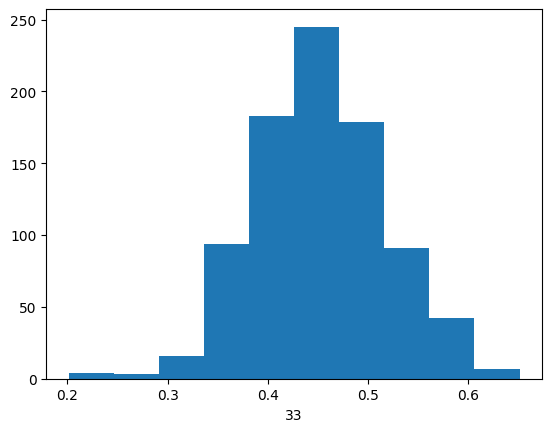

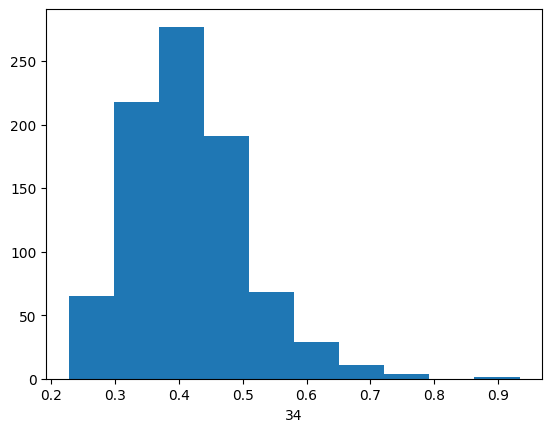

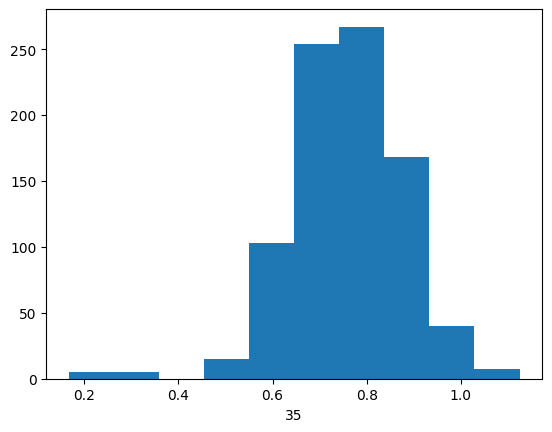

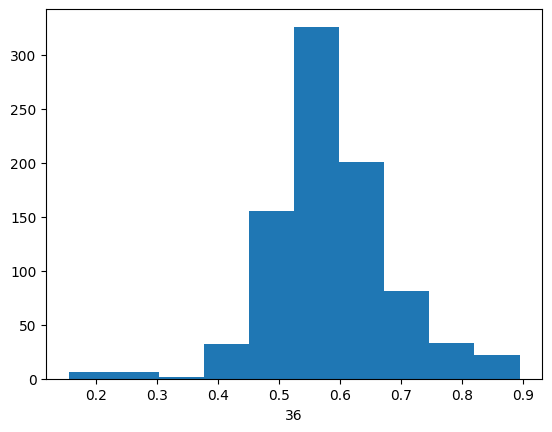

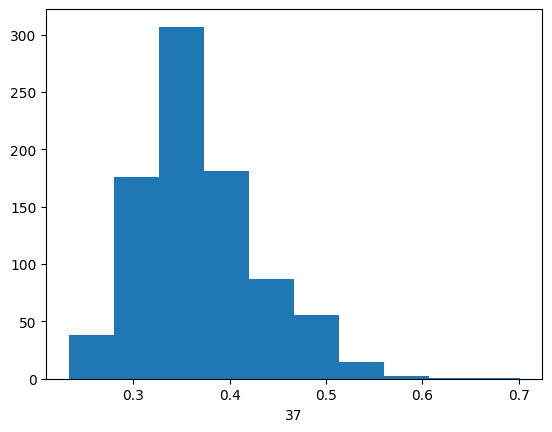

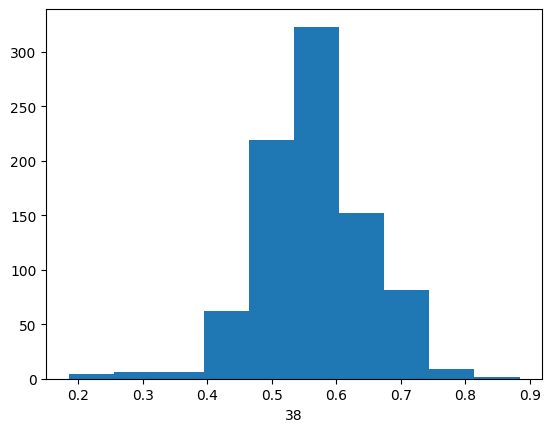

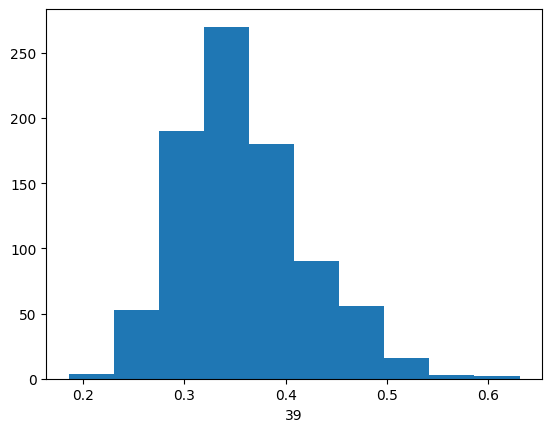

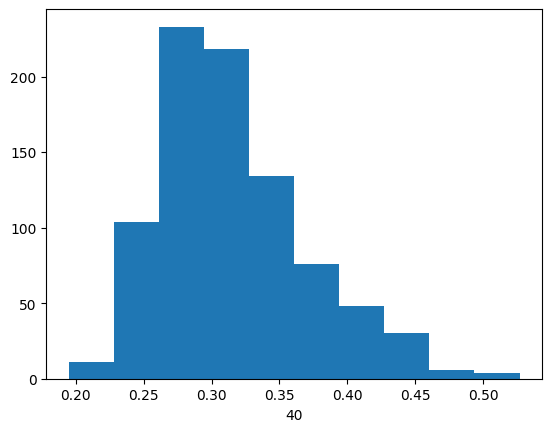

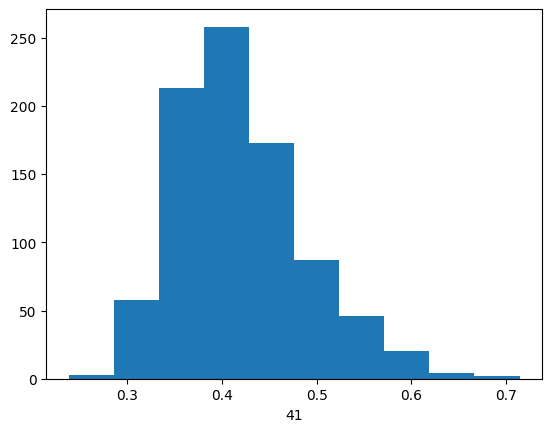

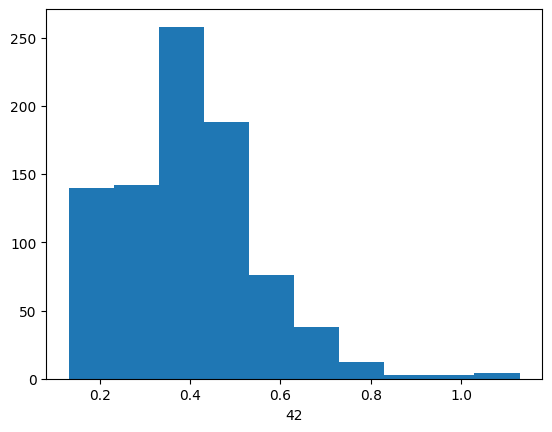

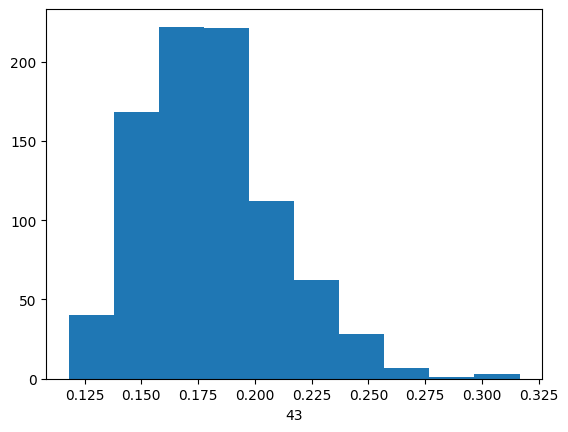

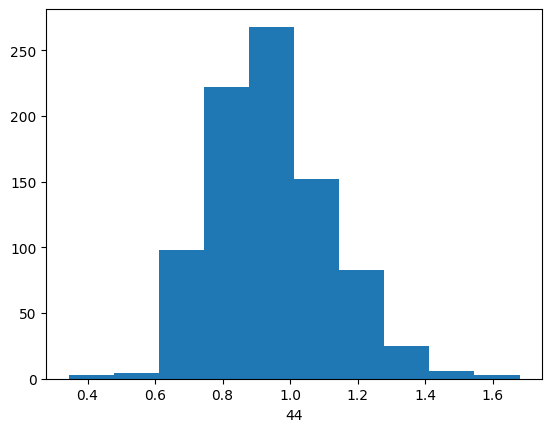

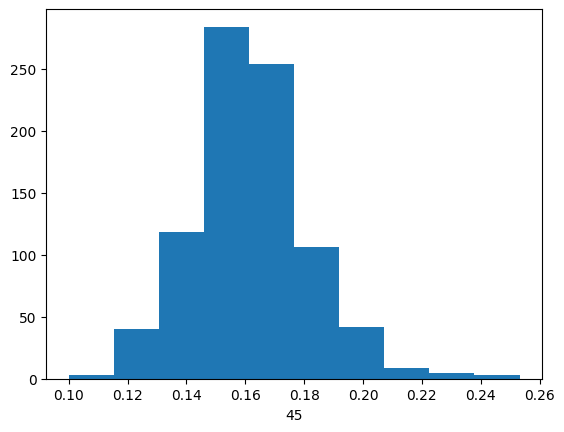

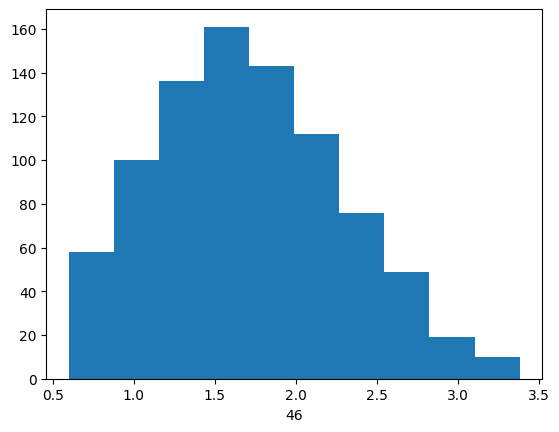

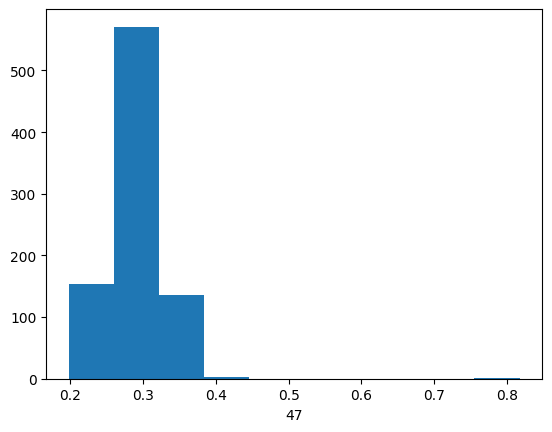

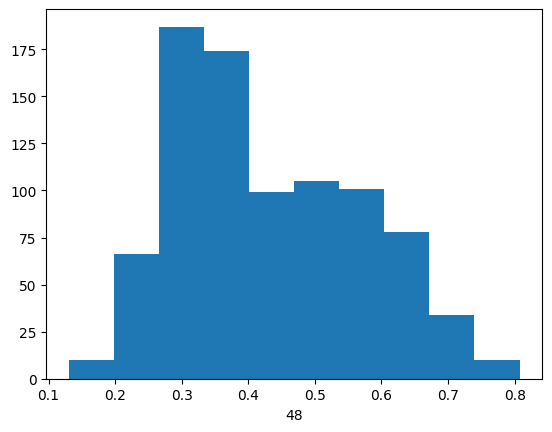

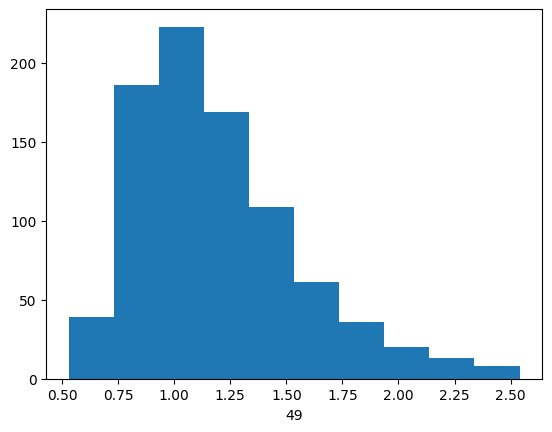

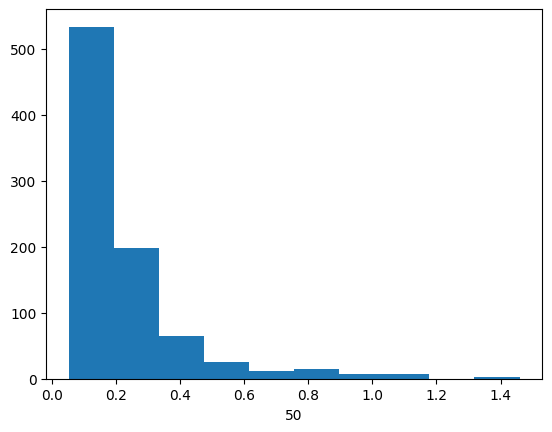

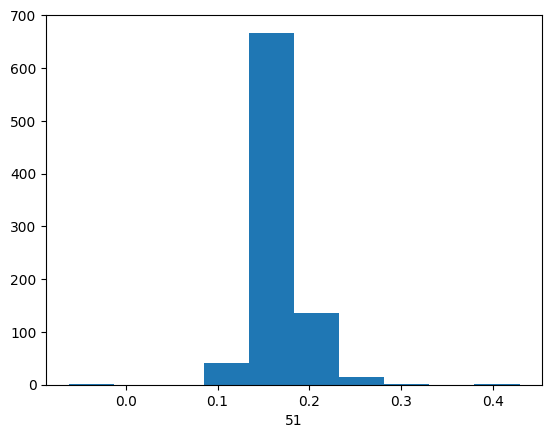

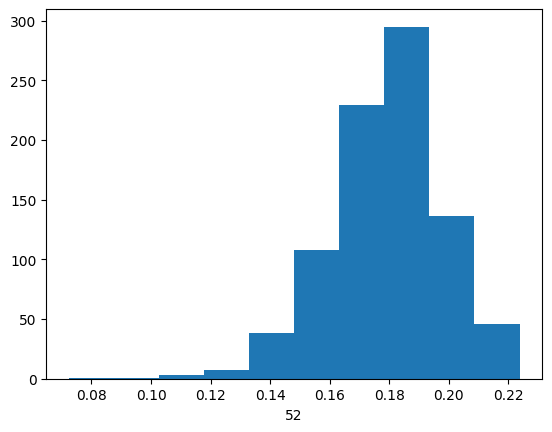

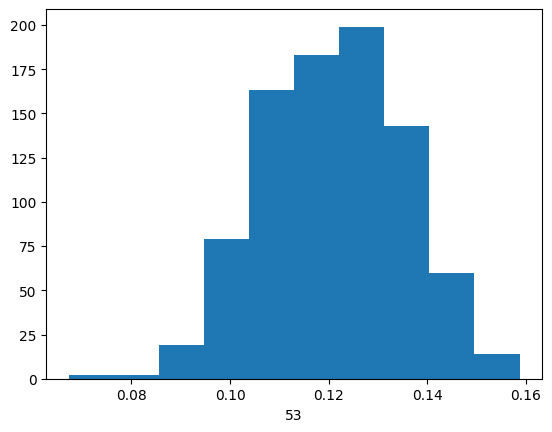

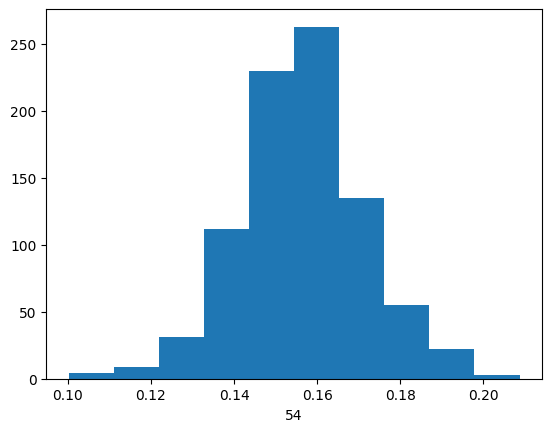

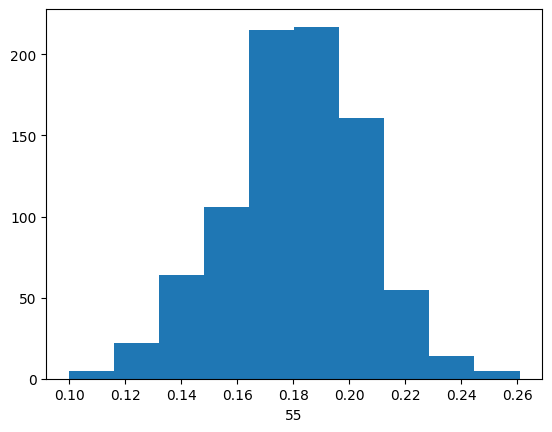

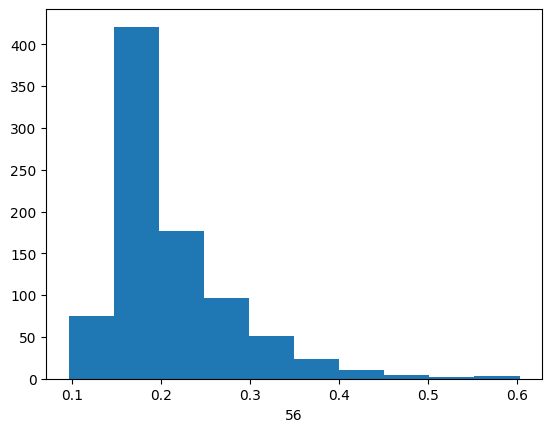

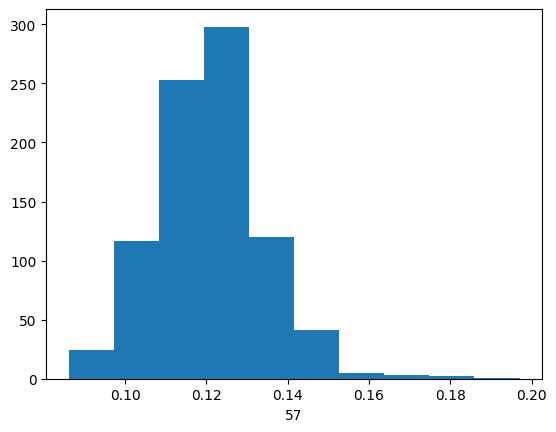

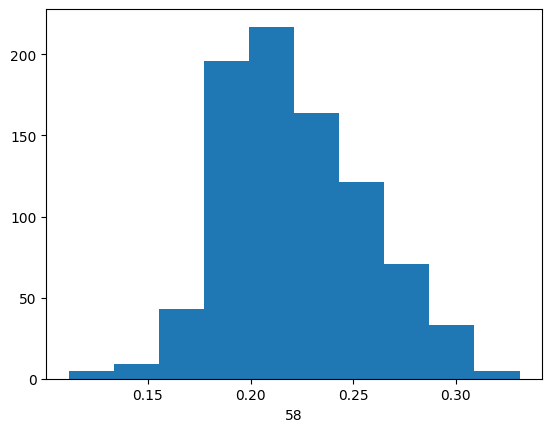

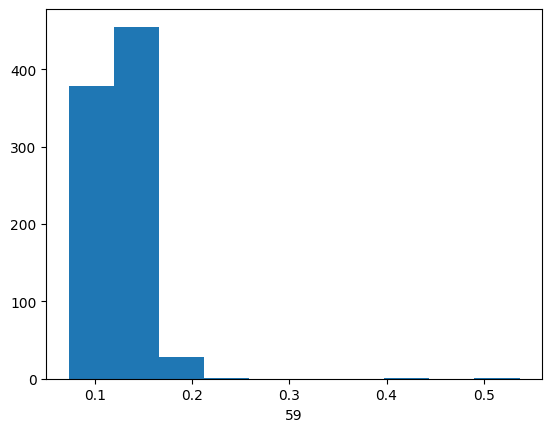

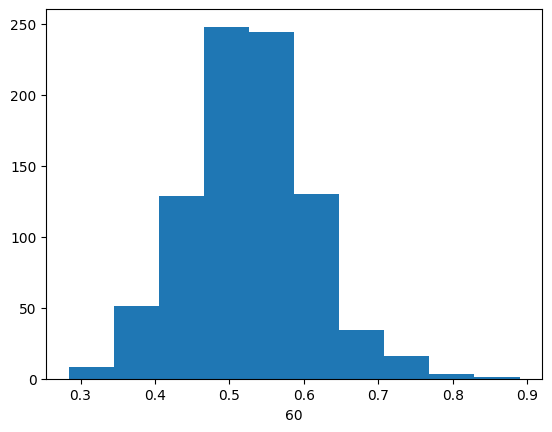

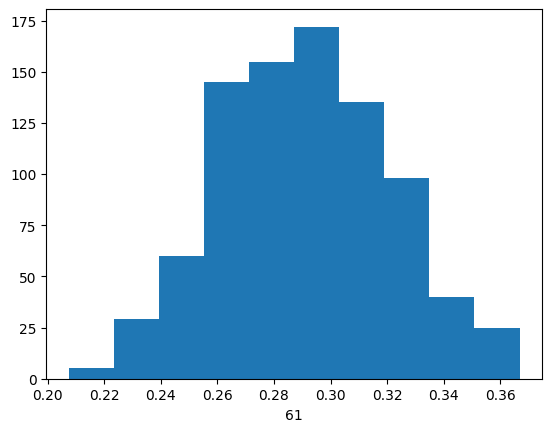

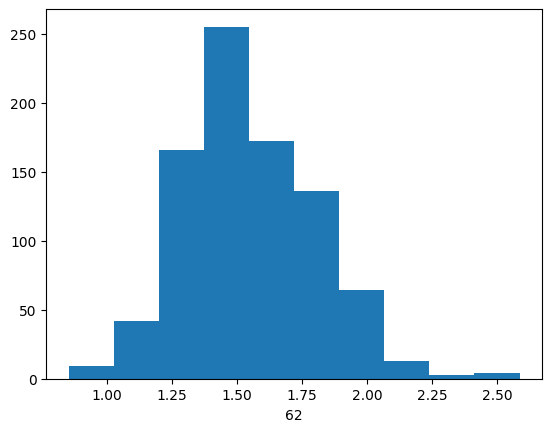

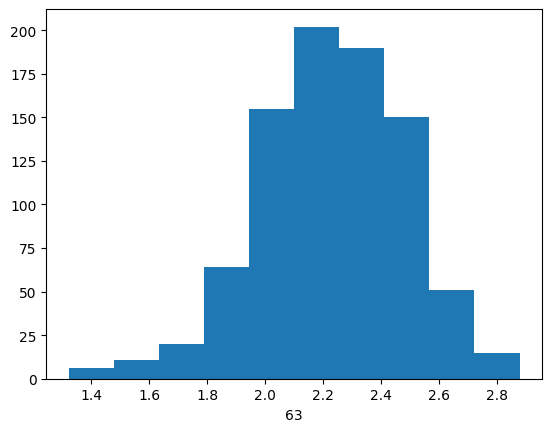

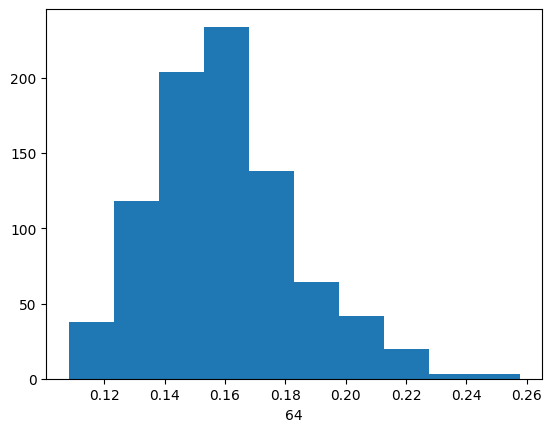

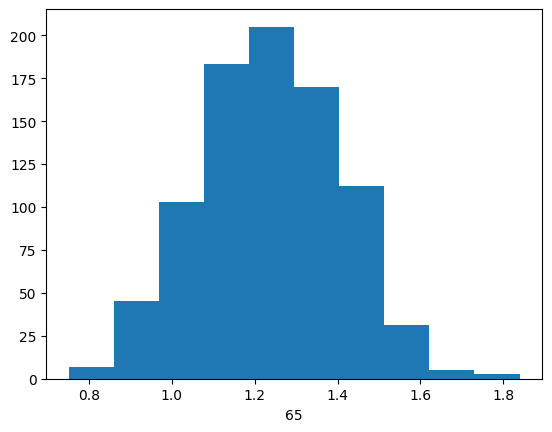

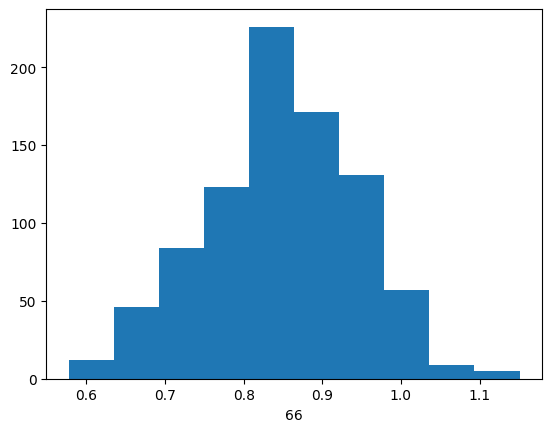

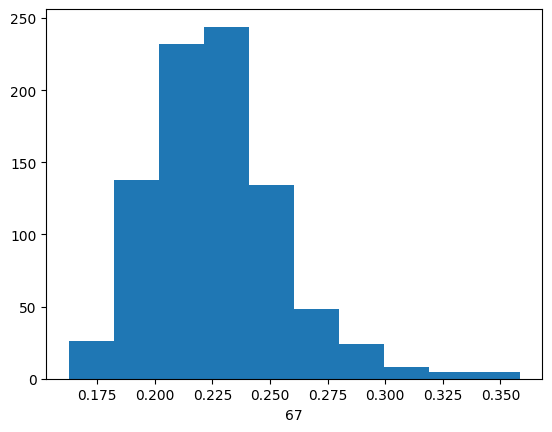

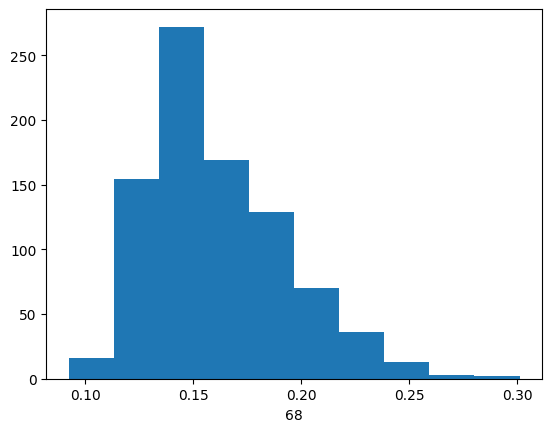

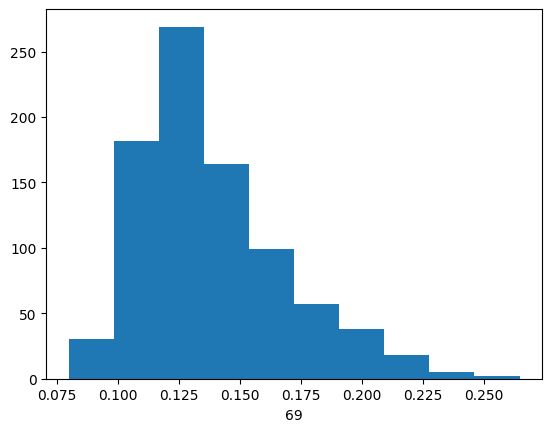

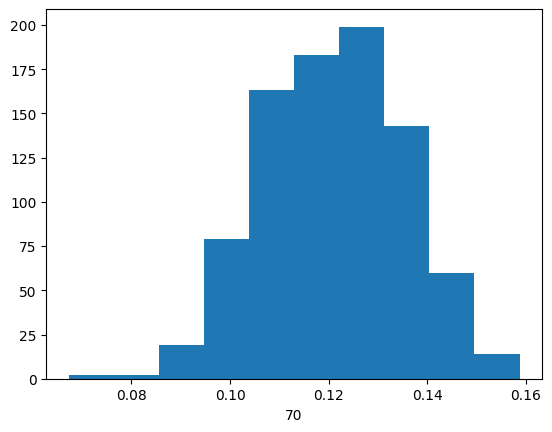

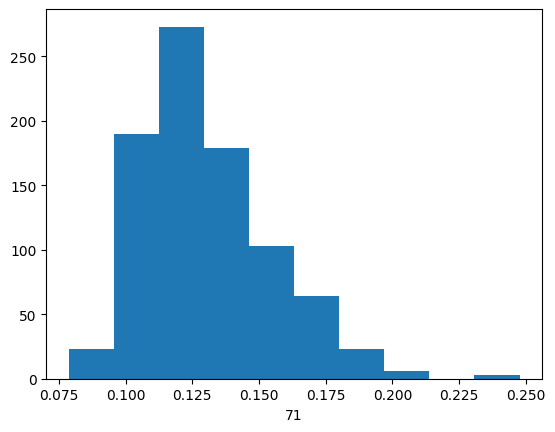

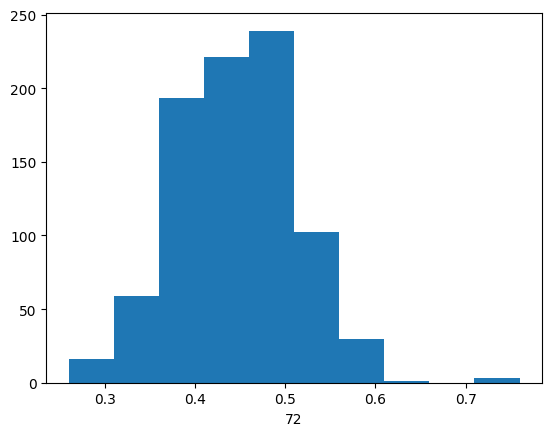

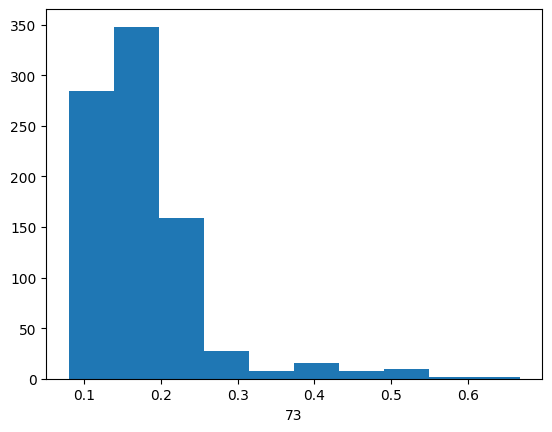

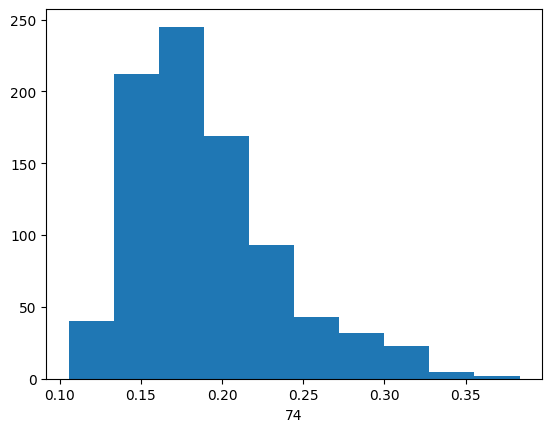

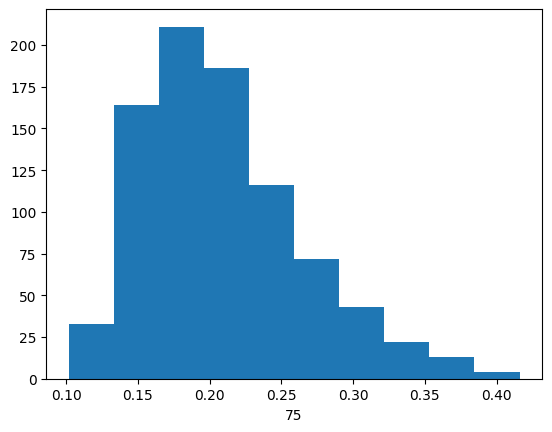

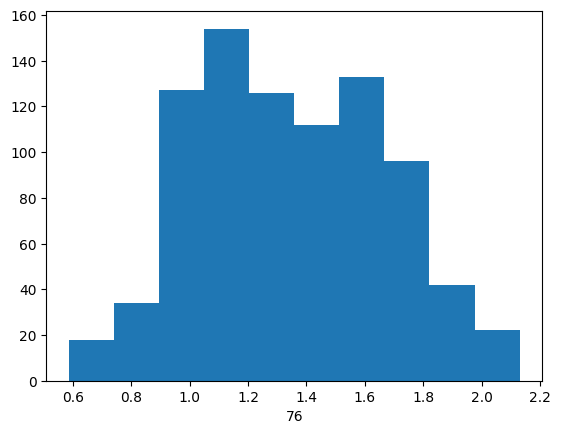

In [ ]:
#Plot histograms for each column of both the data sets
print('---------------------------------------------')
print('Histogram for each column of Mice data set')
print('---------------------------------------------')
for col in data_mice_train.columns.values:
  if (data_mice_train[col].dtypes == 'int64') | (data_mice_train[col].dtypes == 'float64'):
    plt.hist(data_mice_train[col])
    plt.xlabel(col)
    plt.show()

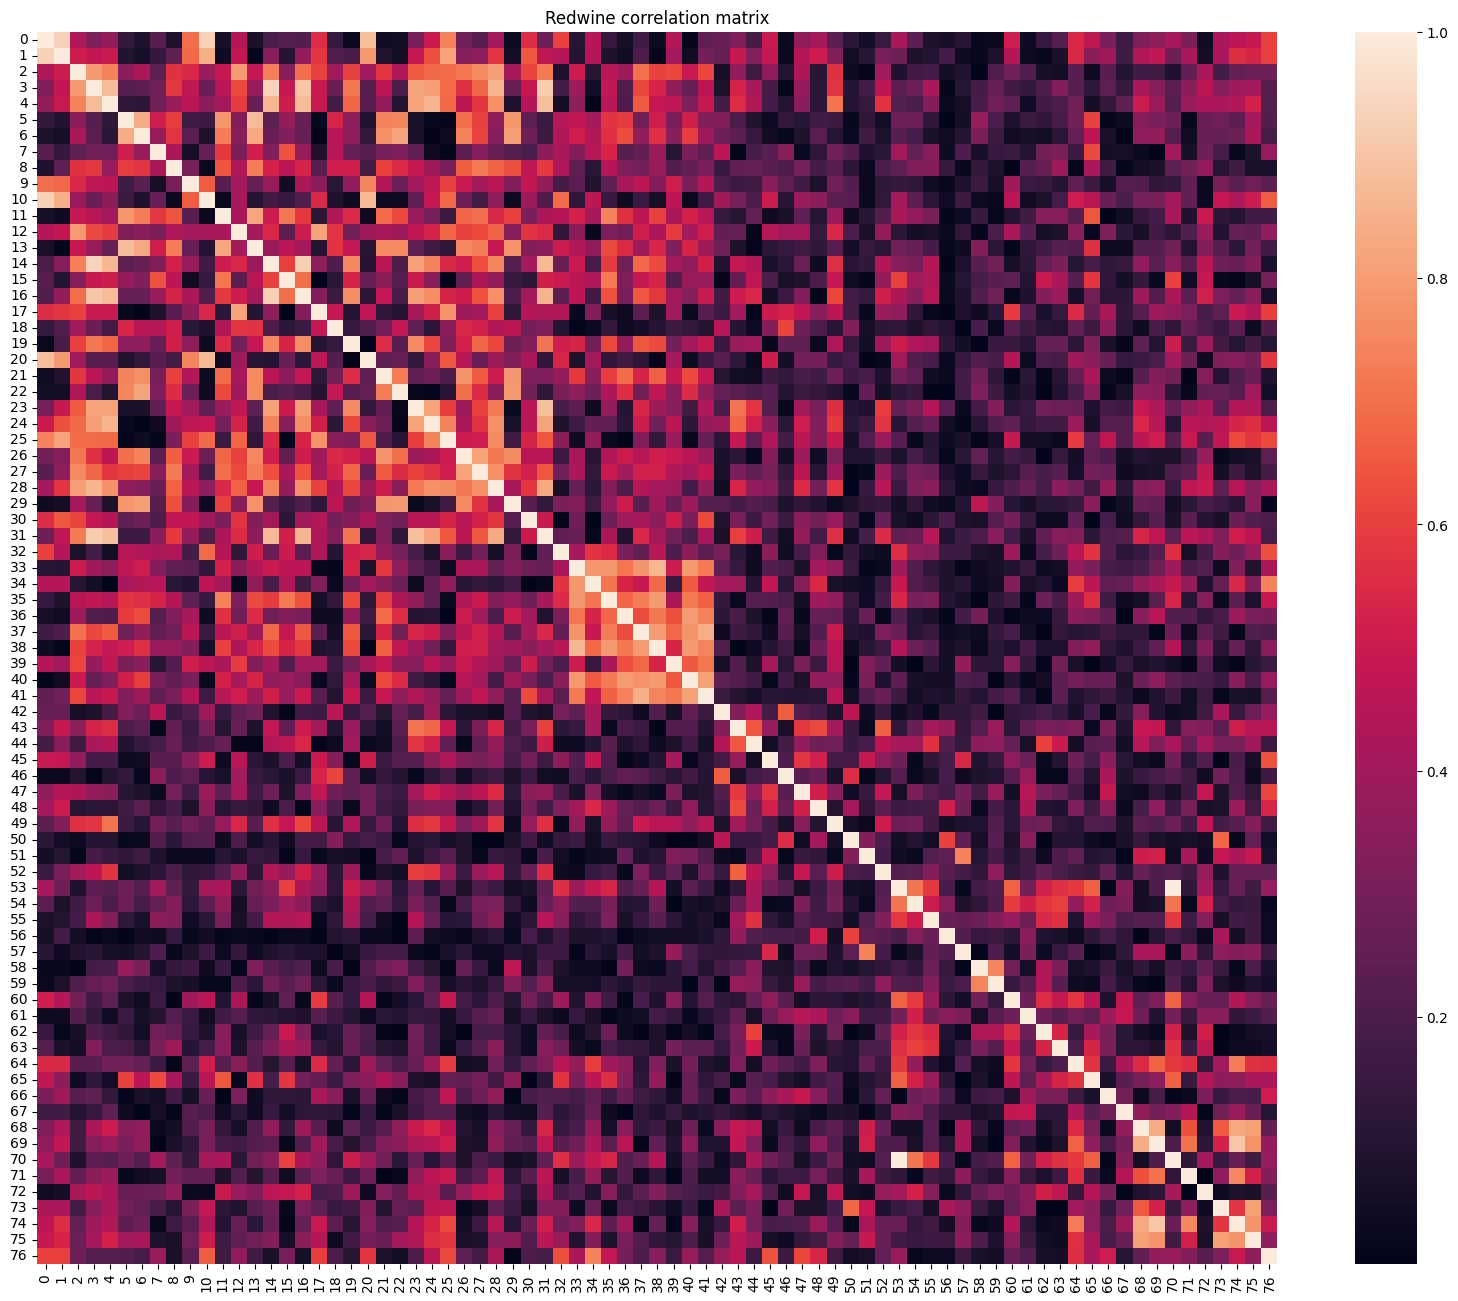

The total no.of features in the given data set are:
 77

The total features in the given data set are:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]

No.of features with correlation coefficent < 0.9 are:
 70

The columns which are to be retained:
 [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 75, 76]


In [ ]:
#Correlation matrix plot for red wine
corr_mat_mice = data_mice_train.corr(method = 'spearman')#Spearman used for assesing non-linear relationship among the variable
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corr_mat_mice), annot= False)# Shows the abs value
plt.title('Redwine correlation matrix')
plt.show()

#Makes the values to zero whose correlation is < 0.9 and also the diagonal entries For easy identification
#For redwine
mod_corr_mat_mice = corr_mat_mice.copy()#Modified corr mat for easy visualisation of corr coeff where it is > or < 0.9
corr_mat_mice_array = mod_corr_mat_mice.to_numpy()
indices = np.where(abs(corr_mat_mice_array)>0.9)
rows = indices[0]
cols = indices[1]
row_headers = corr_mat_mice.index.tolist()
col_headers = corr_mat_mice.columns.tolist()
print("The total no.of features in the given data set are:\n",len(row_headers))
print("\nThe total features in the given data set are:\n",row_headers)
pairs = [(row_headers[row], col_headers[col]) for row, col in zip(rows, cols)]

#Remove the duplicate pairs
unique_pairs = set()

for pair in pairs:
  unique_pairs.add(tuple(sorted(pair)))
for pair in unique_pairs:
  header_value = pair[0]
  for header in pair:
    corr_mat_mice.rename(columns = {header: header_value}, index = {header: header_value}, inplace = True)
row_headers = corr_mat_mice.index.tolist()
col_headers = corr_mat_mice.columns.tolist()


row_headers_unique = list(set(row_headers))

print("\nNo.of features with correlation coefficent < 0.9 are:\n",len(row_headers_unique))
cols_to_retain = row_headers_unique #The columns which are to be retained are stored in this array
print("\nThe columns which are to be retained:\n",cols_to_retain)



The code in the above cell determines the features whose correlation coefficent >0.9 between two features and retains one of them.

Observation:
so out of 77 features 7 features are removed that means available features=70

0    -2.210166e-16
1     7.360367e-16
2     6.825816e-16
3     5.119362e-16
4    -3.700743e-17
          ...     
65   -2.919475e-16
66   -4.934325e-16
67    1.398059e-16
68    3.063393e-16
69   -3.741863e-16
Length: 70, dtype: float64


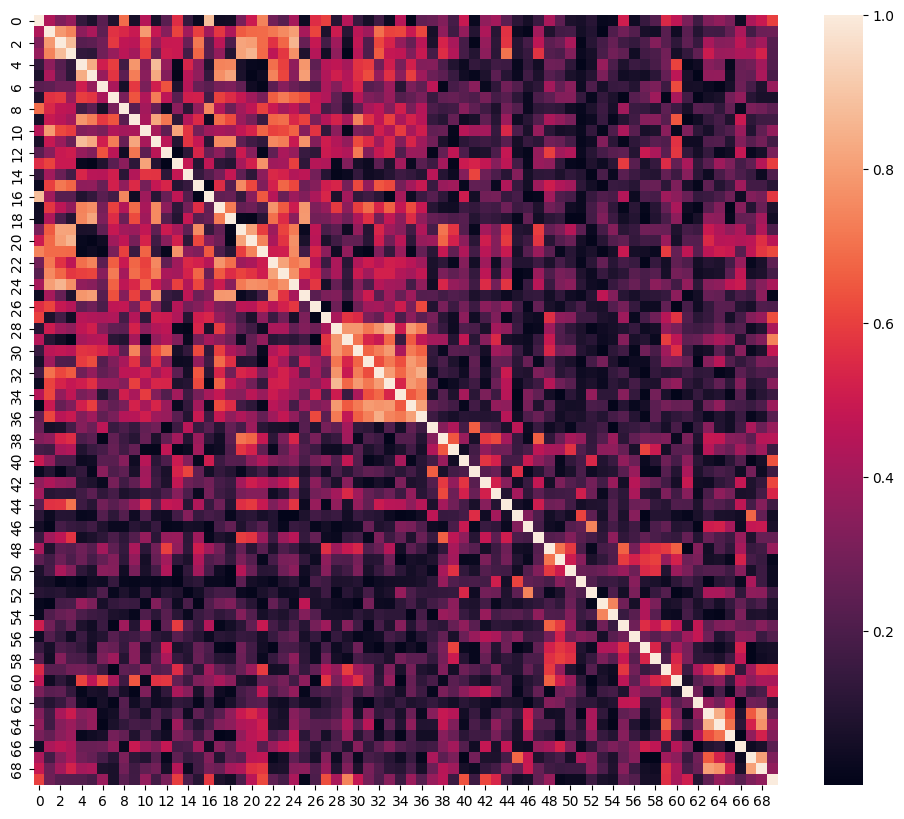

In [ ]:
# Normalize data (shift and scale so that columns are zero mean and unit variance)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() # For data normalization

scaler.fit(data_mice_train[cols_to_retain]) # Compute mean and std
train_X = pd.DataFrame(scaler.transform(data_mice_train[cols_to_retain])) # Use mean and std
train_Y = pd.DataFrame(y_train)


print(train_X.mean())#Prints the mean of the training data which will be zero after normalisation

corrMat = train_X.corr(method='spearman') # Check correlation again
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(abs(corrMat), annot=False)
plt.show()



In [ ]:
# Normalize test data using the same scaler that was fitted on training.

test_X = pd.DataFrame(scaler.transform(data_mice_valid[cols_to_retain]))
test_Y = pd.DataFrame(y_valid)
display(test_Y)
print(test_X.mean())

class
1057      7
208       1
986       7
8         0
1079      7
...     ...
792       5
326       2
58        0
817       5
424       2

[216 rows x 1 columns]

0    -0.062460
1    -0.002614
2     0.095971
3     0.066123
4     0.050615
        ...   
65   -0.012797
66    0.019313
67   -0.091711
68   -0.019309
69   -0.085358
Length: 70, dtype: float64


# c. Train, validate varying at least one hyperparameter, and test at least two types of models: [2]
i. Random forest
ii. Support vector classification using RBF kernel
iii. Neural network with single hidden layer (output layer should be have softmax activation)

The confusion Matrix gives a comparison between actual and predicted values. The confusion matrix is a N x N matrix, where N is the number of classes or outputs. The confusion Matrix allows us to measure Recall and Precision, which, along with Accuracy and the AUC-ROC curve, are the metrics used to measure the performance of ML models. The F1 score is the weighted average of precision and recall. For unbalanced data set F1 score is more useful than accuracy. Therefore for balanced class, we will use accuracy

In [ ]:
#Support vector classification using RBF Kernel
#Let's use automated grid search over a range of hyperparameters

from sklearn.model_selection import GridSearchCV #GridsearchCV is used for hyperparameter tuning, evaluates each combination of hyperparameters using crossvalidation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score#To check how accuarate is our predicted data with true data
from sklearn.metrics import make_scorer, f1_score

print('-------------------------------')
print('Training SVC using GridSearchCV')#SVC is a type of SVM for classification tasks
#SVR is used for regression tasks
scoring = 'accuracy'#Since balanced


# #Training, Validation using Support vector machine with RBF kernel for classification
# #Let the hyperparameter be the regularisation parameter C: [0.1,0.5,1,2,10]. higher values of C leads to smaller margin and overfitting; Lower values of C will lead to larger margin and underfitting

from sklearn import svm
svc = svm.SVC(kernel= 'rbf')#Given in the question to use RBF kernel
hp = {'C': [0.1,0.2,1,5,10] , 'gamma': [0.1,0.01,0.001]}#, 'gamma': ['scale', 'auto'], 'epsilon': [0.01,0.1,0.2]}

train_Y = np.ravel(train_Y)
clf_svc = GridSearchCV(estimator = svc, param_grid = hp, cv =5, scoring = scoring)#5- fold cross validation is used
clf_svc.fit(train_X,train_Y)

best_params_svc = clf_svc.best_params_#Best hyper parameters
print(best_params_svc)
best_score_svc = clf_svc.best_score_#Best score
print('Best ' + scoring + ":" + str(best_score_svc))
best_model_svc = clf_svc.best_estimator_#best fit model


print('CLASSIFICATION REPORT')
y_pred_svc = best_model_svc.predict(np.array(test_X))#The output is predicted and the accuracy is printed
print(classification_report(test_Y, y_pred_svc))




-------------------------------
Training SVC using GridSearchCV
{'C': 5, 'gamma': 0.01}
Best accuracy:0.9988439306358382
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       1.00      1.00      1.00        24
           2       0.96      1.00      0.98        22
           3       1.00      0.97      0.99        38
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



The accuracy with support vector classification is achieved as 99.88%. So, the feature eliminaton is not done for the SVC.

In [ ]:
#Classification with Random forest with hyper parameters max_depth and no.of trees
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
hp =  {'max_depth': [2,5,10,20], 'n_estimators': [10,30,100]}
clf_rf = GridSearchCV(estimator = rfc, param_grid = hp, cv =5, scoring = scoring)#5- fold cross validation is used
clf_rf.fit(train_X,train_Y)

#Finds out the best model and parameters
best_params_rf = clf_rf.best_params_
print(best_params_rf)
best_score_rf = clf_rf.best_score_
print('Best ' + scoring + ":" + str(best_score_rf))
best_model_rf = clf_rf.best_estimator_

print('CLASSIFICATION REPORT')
y_pred_rf = best_model_rf.predict(np.array(test_X))
print(classification_report(test_Y, y_pred_rf))#The output is predicted and the accuracy is printed




{'max_depth': 20, 'n_estimators': 100}
Best accuracy:0.9814692835058476
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      0.96      0.96        24
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        20
           5       0.97      0.97      0.97        31
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        27

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



Observation: The classification accuracy is found to be 98% with Random forest model, with best max_depth as 20 and no.of trees = 100.
The error is more compared to SVM in RF.

# d. See if removing some features systematically will improve your models using recursive feature elimination https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [ ]:
#https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).
#Code has been inspired from the below mentioned website
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
#Importing the libraries
#RFE for random forest
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#rfe for random forest
rfecv_rf  = RFECV(estimator =best_model_rf, step =1, cv=5, scoring = 'accuracy',min_features_to_select= 1 )
rfecv_rf.fit(train_X,train_Y)
print(f"Optimal number of features: {rfecv_rf.n_features_}")#optimal No.of features will be calculated and printed

Optimal number of features: 38


Rank of the selected features:

0: Rank 1
6: Rank 20
8: Rank 22
9: Rank 21
10: Rank 19
12: Rank 28
13: Rank 1
14: Rank 14
15: Rank 1
16: Rank 1
17: Rank 1
26: Rank 12
27: Rank 1
28: Rank 1
29: Rank 1
30: Rank 1
31: Rank 1
33: Rank 1
34: Rank 25
35: Rank 18
37: Rank 23
40: Rank 2
41: Rank 15
43: Rank 27
44: Rank 13
45: Rank 33
46: Rank 1
48: Rank 1
49: Rank 1
50: Rank 1
51: Rank 1
55: Rank 1
57: Rank 6
58: Rank 1
59: Rank 1
60: Rank 1
67: Rank 8
69: Rank 1


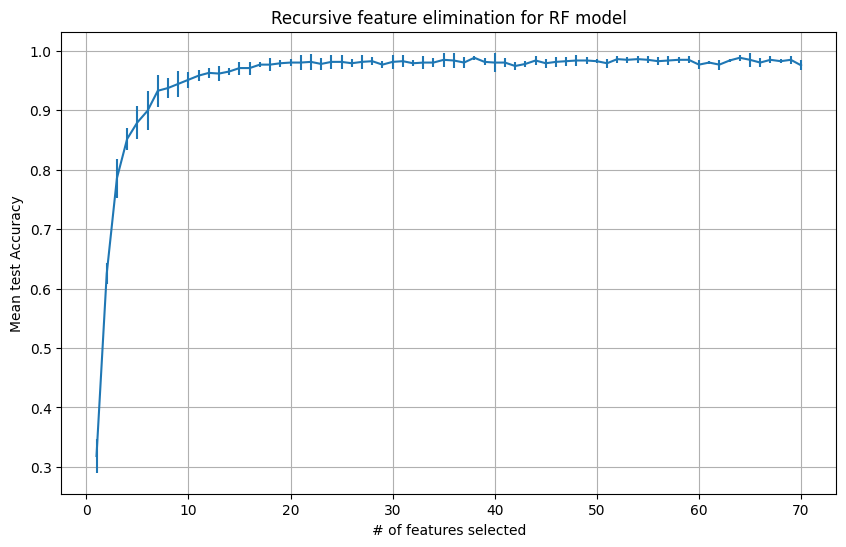

In [ ]:
sel_ftrs_rf = train_X.columns[rfecv_rf.support_]#Out of the total features, considers only selected features
rank = rfecv_rf.ranking_#Assigns rank to all the selected features based on its priority

print('Rank of the selected features:\n')
for f, rank in zip(sel_ftrs_rf, rank):
  print(f'{f}: Rank {rank}')

n_scores = len(rfecv_rf.cv_results_["mean_test_score"])
plt.figure(figsize=(10,6))
plt.xlabel('# of features selected')
plt.ylabel('Mean test Accuracy')
plt.title('Recursive feature elimination for RF model')
plt.errorbar(range(1, n_scores + 1),rfecv_rf.cv_results_["mean_test_score"],yerr=rfecv_rf.cv_results_["std_test_score"],)
plt.grid()
plt.show()

As the model doesn't have the correlated features the accu racy is constant over the number of features. The optimal model of RFE can lie from the range 20-70 depending on the cross validation technique. Test accuracy remains constant from no.of fatures >20

# 3. Practice using pre-trained neural networks to extract domain-specific features for new tasks.

The links used in the question 3 are
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
https://chat.openai.com/c/2e99751b-a79e-4de0-944e-829ebc63fc5b
 and the additional links if any are pasted in the respective sub sections.

In [ ]:
#Importing the data from google drive
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/hymenoptera_data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#The code for 3a is directly pasted from the website given in the question and it is run
#Importing the required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode



In [ ]:
#The code is taken directly from the website https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and run
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = folder_path
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}#Takes the images from the path specified

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}#takes 4 among the data set from train and val folders
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes #two classes in train folder they are ants and bees
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


tensor([0, 0, 0, 0])


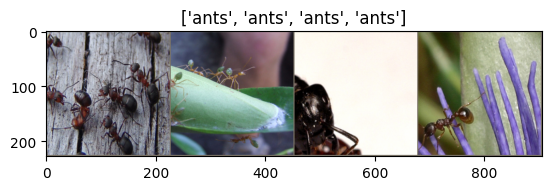

In [ ]:
#Visualize a few images
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train'])) #Taking features from training
# print(classes)
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
# out_class = torchvision.utils.make_grid(classes)
# print(out_class)
imshow(out, title=[class_names[x] for x in classes])

The number of features in the image is printed as the output from the above code when the input is given as a sample image.

observation:
The code is run succesfully.

# b. Write a function that outputs ResNet18 features for a given input image. Extract features for training images (in image_datasets['train']). You should get an Nx512 dimensional array.

In [ ]:
#The links used fro this code https://chat.openai.com/c/2e99751b-a79e-4de0-944e-829ebc63fc5b
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

#Function that outputs ResNet18 features for the given input data set
#It extracts the features for traing images from the given data set and outputs NX512 dimensional array
import torch
import torchvision.models as models
import torchvision.transforms as transforms

def extract_resnet_features(image): #Func definition

    resnet = models.resnet18(pretrained=True)#Loads ResNet18 model


    modules = list(resnet.children())[:-1] # Removing the last layer (the fully connected layer)
    resnet = torch.nn.Sequential(*modules)


    resnet.eval() #Sets the model to evaluation mode

    # Applying transformations to the input image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])

    image_tensor = transform(image)
    image_tensor = image_tensor.unsqueeze(0)    #Adds  batch dimension to the input image

    # Input image is passed through the model to obtain the feature vector
    with torch.no_grad():
        features = resnet(image_tensor)
    features = features.squeeze()# Remove the batch dimension
    features = torch.flatten(features)#flattens the feature vector
    return features.numpy()    # Returns feature array


In [ ]:
#The example for the above written function
import numpy as np
from torchvision import datasets

# Load the training dataset
data_path = folder_path
image_datasets = datasets.ImageFolder(data_path)

# Extract ResNet18 features for all training images
features_list = []
for i in range(len(image_datasets)):
    image, _ = image_datasets[i]
    features = extract_resnet_features(image)
    features_list.append(features)

# Convert the list of feature vectors to a numpy array
features_array = np.vstack(features_list)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 84.8MB/s]


In [ ]:
#To print the dimension the output which is NX512
print("ResNet18 features for a given input image set:\n",features_array.shape)

ResNet18 features for a given input image set:
 (397, 512)


In the above 3 cells, function to extract the resnet18 features is written in the first cell, Example is provided in the second cell which takes the input as the given folder which contains set of images. And produces the the size of the array as ouptut in the 3rd cell.

# c. Compare RBF kernel SVM (do grid search on kernel width and regularization) and random forest (do grid search on max depth and number of trees). Test the final model on test data and show the results -- accuracy and F1 score.

In [ ]:
#https://chat.openai.com/c/d7ee86a4-61e0-4bd6-92c7-89b6046f2136 links used for this section
#The below function is similar to the one in 3a,3b with few modifications
#Importing the required libraries
import torch
from torchvision import models,datasets,transforms
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

# Applying transformations to the input image
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])
#Specifying the path to the folders and loaded them to dataset


#The function which is similar to the one in 3b, except that the labels are also returned
def extract_resnet_features(model,data):#Func definition
   model.eval()
   ftrs = []#ftrs array initalisation
   labels = [] #label initialisation
   with torch.no_grad():#Data splitting will be done inside
    for inputs,labels_batch in data:
      features_batch = model(inputs)
      ftrs.append(features_batch)
      labels.append(labels_batch)
   ftrs = torch.cat(ftrs, dim=0)
   labels = torch.cat(labels, dim=0)
   return ftrs.numpy(),labels.numpy()

resnet = models.resnet18(pretrained=True)#Loads ResNet18 model
modules = list(resnet.children())[:-1] # Removing the last layer (the fully connected layer)
resnet = torch.nn.Sequential(*modules)

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=False, num_workers=4)
              for x in ['train', 'val']}#takes 4 among the data set from train and val folders
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes #two classes in train folder they are ants and bees
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_ftrs, train_labels = extract_resnet_features(resnet,dataloaders['train'])#The features will be extracted from this for training data
test_ftrs, test_labels = extract_resnet_features(resnet,dataloaders['val'])#The features will be extracted from this for testing data





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the wo

In [ ]:
#Performing the RF and SVM on the data set of ants and bees
train_ftrs = train_ftrs.reshape(train_ftrs.shape[0],-1)#reshaping the array for dimension match
test_ftrs = test_ftrs.reshape(test_ftrs.shape[0],-1)#reshaping the array for dimension match
svm_hp = {'C': [0.1,0.2,1,5,10] , 'gamma': [0.1,0.01,0.001]}#Defining the hyper parameters for SVM
rf_hp =  {'max_depth': [2,5,10,20], 'n_estimators': [10,30,100]}#Defining the hyper parameters for RF

#Grid search is performed with SVC and RF models for the given hyperparameter for hyper parameter tuning
svm_grid_search = GridSearchCV(SVC(kernel='rbf'), svm_hp, cv = 5)
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_hp, cv = 5)
#Best fit of rf model and extracting the best model
rf_grid_search.fit(train_ftrs, train_labels)
best_rf_model = rf_grid_search.best_estimator_

#Best fit of SVM model and extracting the best model
svm_grid_search.fit(train_ftrs, train_labels)
best_svm_model = svm_grid_search.best_estimator_

#Testing the models
#SVM model
svm_predict = best_svm_model.predict(test_ftrs)
svm_accuracy = accuracy_score(test_labels, svm_predict)
svm_f1 = f1_score(test_labels, svm_predict, average = 'weighted')
#RF model
rf_predict = best_rf_model.predict(test_ftrs)
rf_accuracy = accuracy_score(test_labels, svm_predict)
rf_f1 = f1_score(test_labels, rf_predict, average = 'weighted')

In [ ]:
#Printing the accuracy and f1 score of the two models
print("Accuracy of SVM model is:\n",svm_accuracy)
print("F1 score of SVM model is:\n",svm_f1)
print("Accuracy of SVM model is:\n",rf_accuracy)
print("F1 score of SVM model is:\n",rf_f1)

Accuracy of SVM model is:
 0.954248366013072
F1 score of SVM model is:
 0.9543072509510618
Accuracy of SVM model is:
 0.954248366013072
F1 score of SVM model is:
 0.954271964534793


The question 4, is attached in the another file.
And it is watched from the link
https://www.youtube.com/watch?v=5XnHlluw-Eo&t=252s

In [2]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 19 16:30:06 2024

@author: MALATHI PALADUGU
"""
#For doing the question 4 I have followed the links mentioned below
#https://www.youtube.com/watch?v=5XnHlluw-Eo&t=252s
#https://chat.openai.com/c/03a2b147-2e4b-41eb-8f6c-da4665631231
#https://www.youtube.com/watch?v=WLwjvWq0GWA
#The RF regression model is applied on the red wine data set and set the sliders for different features in the data set.
#Varying the proportion of features will change the mean square error
#The sliders are used to vary the feature value. The error varies accordingly
#Deployed this model on a local web server using streamlit app.


#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import streamlit as st

#Downloading the redwine data from the website
dataset_redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')#reading the redwine csv file into data_readwine from the csv files uploaded in the folder
#Quality has been taken as the target vector, so dropping it from the data set to sepearate data and target
data_redwine = dataset_redwine.drop(columns=['quality'])#seperating the features and target
y_red = dataset_redwine['quality']#Target vector

#splitting the data into training and testing with the ratio 80:20
data_redwine_train, data_redwine_test, y_red_train, y_red_test = train_test_split(data_redwine, y_red, test_size = 0.2, random_state=42)

#Finding the correlation coeffcients
corr_mat_red = data_redwine_train.corr(method = 'spearman')#Spearman used for assesing non-linear relationship among the variable
#For redwine
mod_corr_mat_red = corr_mat_red.copy()

#If the corr coeff <0.8 it is made as 0 and found out the features with
#Corr oeff >0.8 using the below code. It removes the correlated features and final features are stored in cols_to_retain
mod_corr_mat_red[abs(mod_corr_mat_red) < 0.8] = 0
corr_mat_red_array = mod_corr_mat_red.to_numpy()
indices = np.where(abs(corr_mat_red_array)>0.8)

rows_red = indices[0]
cols_red = indices[1]
row_head_red = corr_mat_red.index.tolist()
col_head_red = corr_mat_red.index.tolist()
pairs_red = [(row_head_red[row], col_head_red[col]) for row, col in zip(rows_red, cols_red)]
#Remove the duplicate pairs
unique_pairs_red = set()

for pair in pairs_red:
  unique_pairs_red.add(tuple(sorted(pair)))
for pair in unique_pairs_red:
  header_value = pair[0]
  for header in pair:
    corr_mat_red.rename(columns = {header: header_value}, index = {header: header_value}, inplace = True)
row_head_red = corr_mat_red.index.tolist()
col_head_red = corr_mat_red.columns.tolist()

row_headers_unique_red = list(set(row_head_red))
#redwine_col_to_retain = row_headers_unique_red.columns.tolist()
redwine_col_to_retain = col_head_red

#Preprocessing using standard scaler(normalising) the data
scaler_red = preprocessing.StandardScaler()#Normalises the data for red is named as  scale_coeff_red


scaler_red.fit(data_redwine_train[redwine_col_to_retain])#It computes mean and standard deviation for redwine training data set

#Training data of input and target after normalisation
train_X_red = pd.DataFrame(scaler_red.transform(data_redwine_train[redwine_col_to_retain]), columns = redwine_col_to_retain)#Uses mean and std deviation
train_Y_red = pd.DataFrame(y_red_train)

#Testing on redwine data
test_X_red = pd.DataFrame(scaler_red.transform(data_redwine_test[redwine_col_to_retain]),columns = redwine_col_to_retain)
test_Y_red = pd.DataFrame(y_red_test)

##***************************************#
##Modeling the red wine data using RF##
##**************************************#
#Even though the target variable is integer
#Regression has been used in this question as it is mentioned to do so
scoring = 'neg_mean_squared_error'#scoring parameter is taken as mean square error
rf_model = RandomForestRegressor()
hp = {'max_depth': [2,5,10,20],'n_estimators': [10,20,30,50,100]}

#Using grid search for the data which is splitted as training
grid_search_rf_red = GridSearchCV(estimator = rf_model, param_grid = hp, cv =5, scoring = scoring)
grid_search_rf_red.fit(train_X_red, train_Y_red.values.ravel())#Fitting the model



#Finding the best parameters for white wine data
best_params_red = grid_search_rf_red.best_params_#best hyperparameters can be found
best_score_red = grid_search_rf_red.best_score_
best_rf_model_red = grid_search_rf_red.best_estimator_#Finds the best model
rf_model_red = RandomForestRegressor(max_depth = best_params_red['max_depth'], n_estimators = best_params_red['n_estimators'])  # calling the model and passing optimum hyperparameter
rf_model_red.fit(train_X_red, train_Y_red.values.ravel())
y_pred_red = best_rf_model_red .predict(data_redwine_test)#Predicting the output for the test input



st.title('Wine Quality Predictor')

#Giving slider for each feature
fixed_acidity = st.slider('fixed acidity', float(data_redwine['fixed acidity'].min()), float(data_redwine['fixed acidity'].max()), float(data_redwine['fixed acidity'].mean()))
volatile_acidity = st.slider('volatile acidity', float(data_redwine['volatile acidity'].min()), float(data_redwine['volatile acidity'].max()), float(data_redwine['volatile acidity'].mean()))
citric_acid = st.slider('citric acid', float(data_redwine['citric acid'].min()), float(data_redwine['citric acid'].max()), float(data_redwine['citric acid'].mean()))
residual_sugar = st.slider('residual sugar', float(data_redwine['residual sugar'].min()), float(data_redwine['residual sugar'].max()), float(data_redwine['residual sugar'].mean()))
chlorides = st.slider('chlorides', float(data_redwine['chlorides'].min()), float(data_redwine['chlorides'].max()), float(data_redwine['chlorides'].mean()))
free_sulfur_dioxide = st.slider('free sulfur dioxide', float(data_redwine['free sulfur dioxide'].min()), float(data_redwine['free sulfur dioxide'].max()), float(data_redwine['free sulfur dioxide'].mean()))
total_sulfur_dioxide = st.slider('total sulfur dioxide', float(data_redwine['total sulfur dioxide'].min()), float(data_redwine['total sulfur dioxide'].max()), float(data_redwine['total sulfur dioxide'].mean()))
density = st.slider('density', float(data_redwine['density'].min()), float(data_redwine['density'].max()), float(data_redwine['density'].mean()))
pH = st.slider('pH', float(data_redwine['pH'].min()), float(data_redwine['pH'].max()), float(data_redwine['pH'].mean()))
sulphates = st.slider('sulphates', float(data_redwine['sulphates'].min()), float(data_redwine['sulphates'].max()), float(data_redwine['sulphates'].mean()))
alcohol = st.slider('alcohol', float(data_redwine['alcohol'].min()), float(data_redwine['alcohol'].max()), float(data_redwine['alcohol'].mean()))

#All the features are saved into it
Features = pd.DataFrame({'fixed acidity': [fixed_acidity], 'volatile acidity': [volatile_acidity], 'citric acid': [citric_acid],
                         'residual sugar': [residual_sugar], 'chlorides': [chlorides], 'free sulfur dioxide': [free_sulfur_dioxide],
                         'total sulfur dioxide': [total_sulfur_dioxide], 'density': [density], 'pH': [pH], 'sulphates': [sulphates],
                         'alcohol': [alcohol]})
prediction = rf_model_red.predict(Features)#Value of the feature is taken
mse = mean_squared_error(test_Y_red,y_pred_red )#Mean square error is computed


st.subheader('Predicted Wine Quality')

st.write(prediction)
st.subheader('Mean square error with the given parameters')
st.write(mse)


2024-03-22 06:24:06.792 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
